# **Entrega 1: E-Corp**

Integrantes: Juan Esteban Cardona Molina, Mateo Caicedo Aguirre, Leidys Guerrero Lobo, Gilberto José Gil Pacheco

# <font color='056938'> **1. Caso de Estudio** </font>
Descripción del caso

La compañía E-Corp cuya principal operación es la **venta de producto de lujo**, ha lanzado desde hace un año su **sito de e-commerce** donde ofrecen una variedad importante de los productos que pueden encontrarse en sus tiendas físicas. El objetivo de esta estrategia es **expandir su base de clientes actuales, a través de nuevos canales de compra y tener mayor cobertura en sitios donde no se encuentran tiendas físicas actualmente.** Sin embargo, en los últimos informes presentados a la dirección, se evidencia que las ventas que son atribuidas al canal digital (e-commerce) no representan un porcentaje importante de participación con respecto al total de las ventas. Esto ha hecho que el retorno a la inversión realizada para la creación y mantenimiento del sitio web no sea la esperada por los directivos. El área encargada del canal digital, considera que las campañas de marketing no están siendo efectivas y este gasto representa un rubro importante que puede llegar a optimizarse. Estas son algunas de las hipótesis que el equipo de canales digitales cree sobre el problema de ventas:

*   Actualmente las campañas de marketing enfocadas a la adquisición de nuevos clientes utilizan atributos muy generales que pueden no ser relevantes para influir en la decisión de compra.
*   No se tiene claro cuáles son los clientes potenciales o con mayor probabilidad de realizar una compra una vez visiten el sitio web, por lo tanto la inversión en pauta puede no estar llegando a los clientes que generan ingresos.

Por ello, la dirección ha contratado a su equipo de consultores para abordar el problema descrito a través del uso de modelos de ML. En otras palabras, quieren conocer si pueden anticiparse a la identificación de clientes potenciales y así optimizar su inversión en pauta digital utilizando atributos que describan mejor a estos clientes potenciales

# <font color='056938'> **2. Datos disponibles** </font>

Para abordar el problema descrito cuenta con la siguientes bases de datos:

**ecommerce-data:** el conjunto de datos consta de información relevante de las sesión pertenecientes a usuarios diferente en un período de 1 año.
 Se les proporciona un diccionario de variables para que pueda tener un mejor entendimiento de los datos disponibles para el desarrollo del caso de estudio. Pueden descargar los archivos en el siguiente [enlace](https://drive.google.com/file/d/1qzutLVHVf3KHPId0CRb1ey2A2stl0kOr/view)

* **Reviews:** Este es el número de páginas de este tipo (Reviews) que visitó el usuario.

* **Reviews_Duration:** Esta es la cantidad de tiempo dedicado a esta categoría de páginas.
* **Informational:** Este es el número de páginas de este tipo (informativas) que visitó el usuario.
* **Informational_Duration:** Esta es la cantidad de tiempo dedicado a esta categoría de páginas.
* **ProductRelated:** Este es el número de páginas de este tipo (relacionadas con productos) que visitó el usuario.
* **ProductRelated_Duration:** Esta es la cantidad de tiempo dedicado a esta categoría de páginas.
* **BounceRates:** Métrica arrojada por Google Analytics que indica el porcentaje de visitantes que ingresan al sitio web a través de una página y salen sin realizar ninguna acción adicional durante la sesión.
* **ExitRates:** Métrica arrojada por Google Analytics que indica el porcentaje de páginas vistas en el sitio web que terminan en esa página específica.
* **PageValues:** Métrica arrojada por Google Analytics que representa el valor medio de una página web que un usuario visitó antes de completar una transacción de comercio electrónico.
* **SpecialDay:** Este valor representa la proximidad de la fecha de navegación en el sitio a días especiales o festivos (por ejemplo, el Día de la Madre o San Valentín).
* **Month:** Mes en el que se realizó la visita al sitio web.
* **OperatingSystems:** Sistema operativo usado por el usuario para navegar en el sitio web.
* **Browser:** Navegador usado por el usuario para navegar en el sitio web.
* **Region:** Región (ubicación geográfica personalizada) desde la cual el usuario navega en el sitio web.
* **TrafficType:** Variable que indica el tipo de tráfico al cual pertenece el usuario que navega en el sitio web (por ejemplo, si llegó al sitio desde un anuncio o a través de una búsqueda).
* **VisitorType:** Tipo de usuario que ingresa al sitio web.
* **Weekend:** Indica si la navegación se realizó en fin de semana.
* **Purchase:** Indica si el usuario realizó una compra o no.



## <font color='8EC044'> **2.1. Importación de datos** </font>

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Lectura de los datos
df_ventas = pd.read_csv("https://raw.githubusercontent.com/estebancardona1/MODULO2/main/ecommerce-data.csv") #na_values='?'

## <font color='8EC044'> **2.2. Exploración de datos** </font>

In [ ]:
# Tamaño del dataset
df_ventas.shape

(12330, 18)

In [ ]:
# Información general del dataset
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Se tiene un total de 18 variables asociadas al caso de estudio, la mayoría de ellas son variables numéricas y el resto categóricas. Se tiene entonces como variable objetivo `(Y)` a la variable `'Purchase'` la cual es una variable tipo `'bool'` o también puede ser llamada como una variable dicotómica.

In [ ]:
# Exploración de los datos
df_ventas.describe()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df_ventas.head(5)

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### **Conversión de Variables**

In [ ]:
# Lista de meses
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Crear un diccionario de mapeo de meses
mapeo_meses = {mes: idx + 1 for idx, mes in enumerate(meses)}

# Mapear los meses en el DataFrame
df_ventas['Month'] = df_ventas['Month'].map(mapeo_meses)

df_ventas

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,Returning_Visitor,False,False


In [ ]:
# Reemplazar True con 1 y False con 0
df_ventas = df_ventas.replace({True: 1, False: 0})

df_ventas

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,Returning_Visitor,0,0


In [ ]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

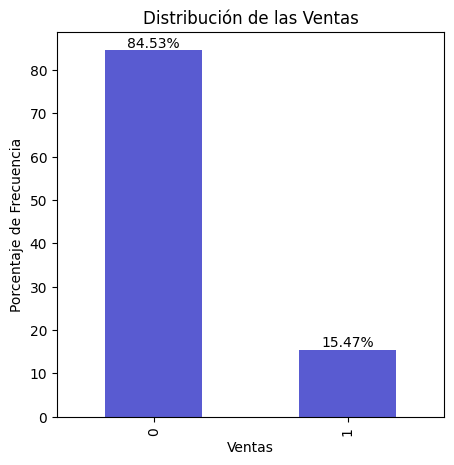

In [ ]:
# Graficar la distribución de 'Purchase'
plt.figure(figsize=(5, 5))
ax = df_ventas['Purchase'].value_counts(normalize=True).mul(100).round(2).plot(kind='bar', color='#595BD1')  # Cambiar el color aquí

# Nombre de los ejes
ax.set_xlabel('Ventas', fontsize=10)
ax.set_ylabel('Porcentaje de Frecuencia', fontsize=10)

# Título del gráfico
plt.title('Distribución de las Ventas', fontsize=12)

# Añadir los porcentajes a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.show()

De acuerdo con los datos obtenidos, se evidencia que la cantidad de compras realizasadas con éxito (1) en la página es menor a la cantidad de compras que no se efectuan (0) en la misma. Por eso, se pueden presentar problemas de desbalance.

## <font color='8EC044'> **2.3. Análisis de variables** </font>

### **2.3.1 Variables Numéricas**

In [ ]:
num_var = ['Reviews',	'Reviews_Duration',	'Informational',	'Informational_Duration',	'ProductRelated',	'ProductRelated_Duration',	'BounceRates',	'ExitRates',	'PageValues',	'SpecialDay']
cat_var = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Purchase']

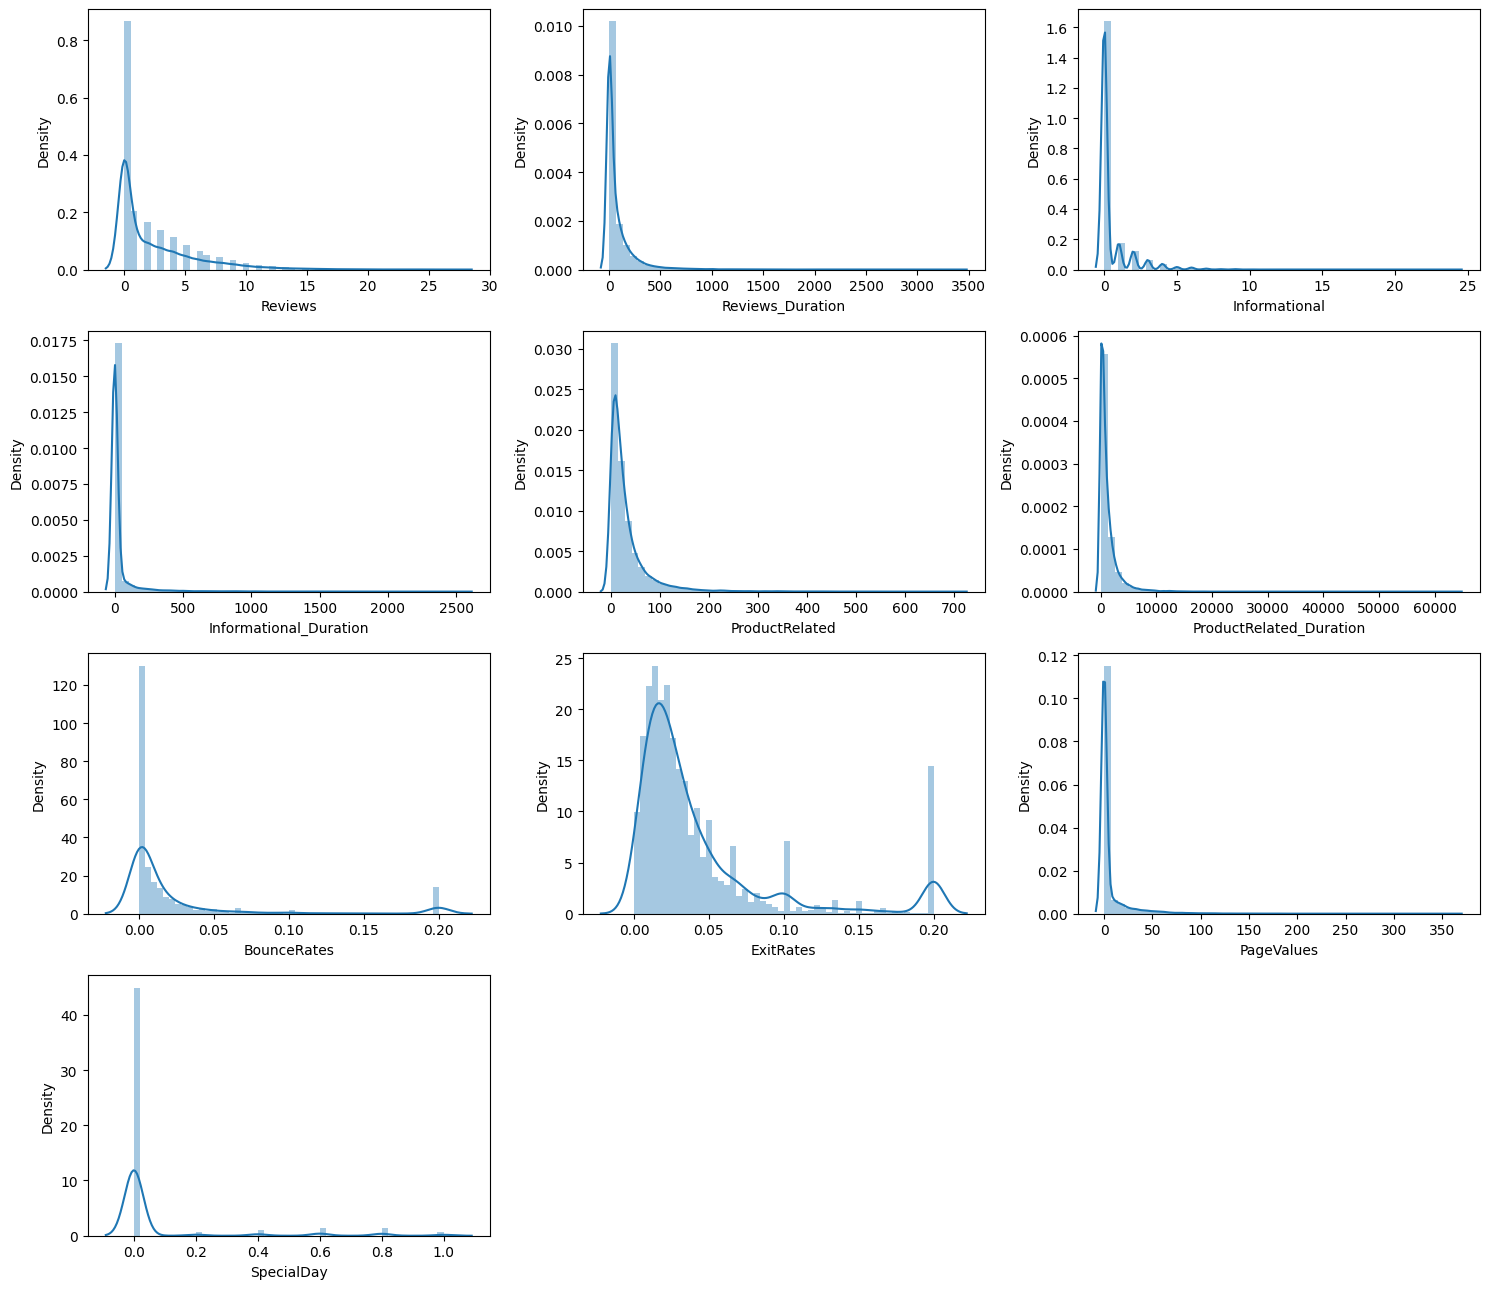

In [ ]:
# Histogramas para variables númericas

plt.figure(figsize=(15, 13))

for i in range(0, len(num_var)):
    plt.subplot(4, 3, i + 1)
    sns.distplot(df_ventas[num_var[i]])
    plt.tight_layout()

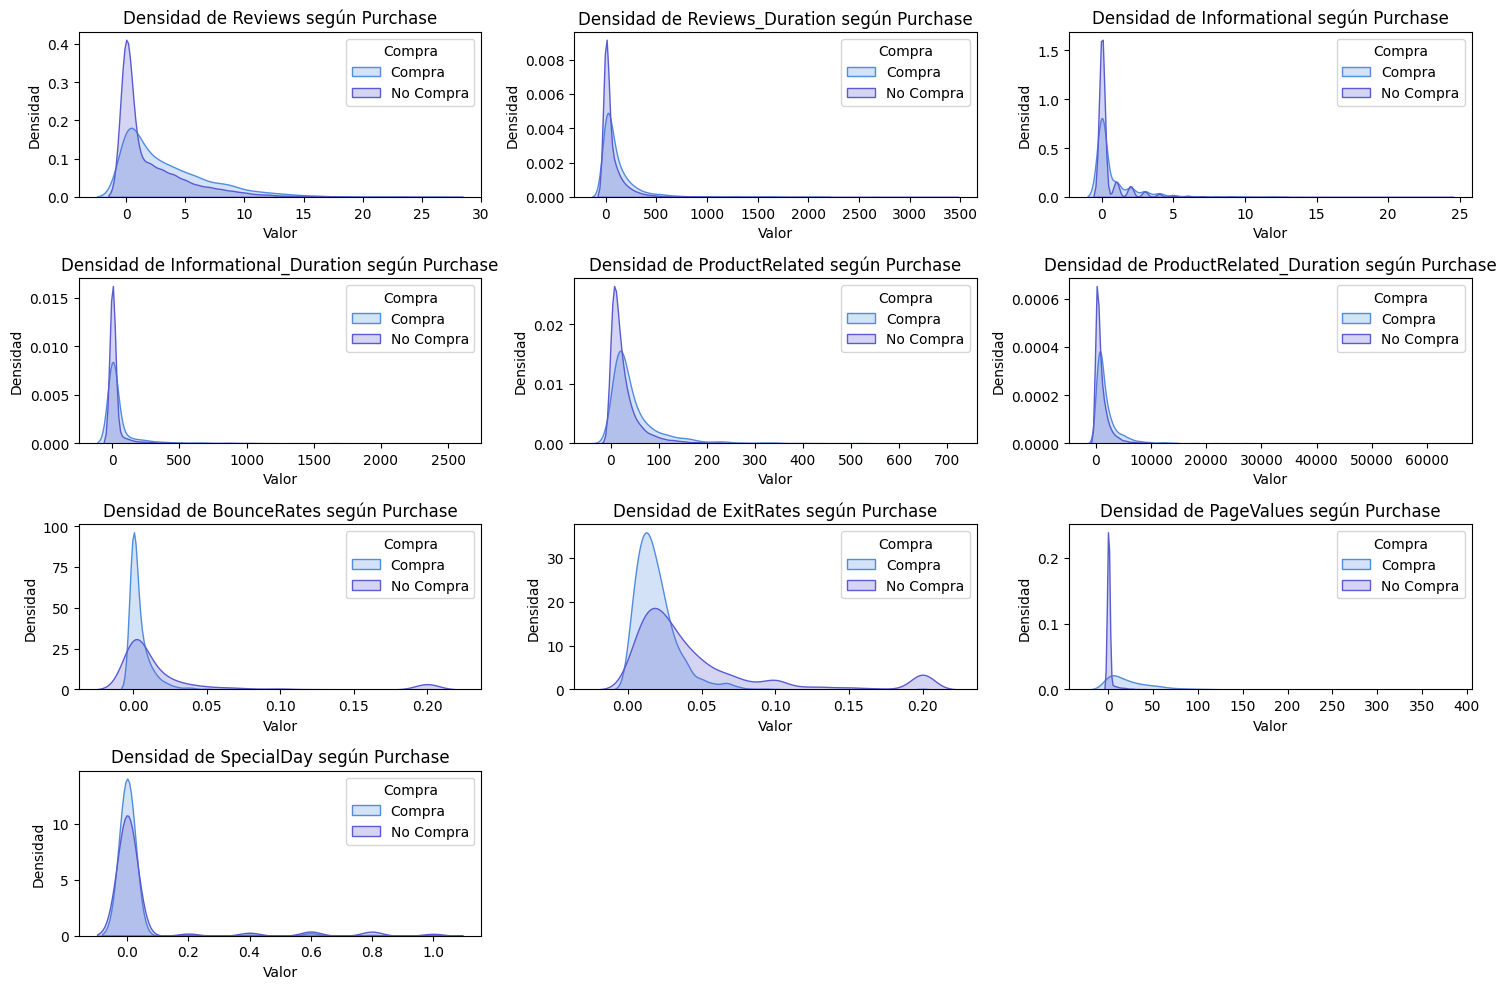

In [ ]:
# Definir las variables numéricas y 'Purchase'
num_var = ['Reviews', 'Reviews_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',
           'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Crear gráficos de densidad para cada variable, separando por 'Purchase'
plt.figure(figsize=(15, 10))

for i in range(len(num_var)):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(data=df_ventas, x=num_var[i], hue='Purchase', fill=True, common_norm=False,
                palette={0: '#595BD1',1: '#518CDE'})  # Cambiar los colores aquí
    plt.title('Densidad de ' + num_var[i] + ' según Purchase')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.tight_layout()

    # Actualizar la leyenda con las etiquetas personalizadas
    plt.legend(title='Compra', labels=['Compra', 'No Compra'])

plt.show()

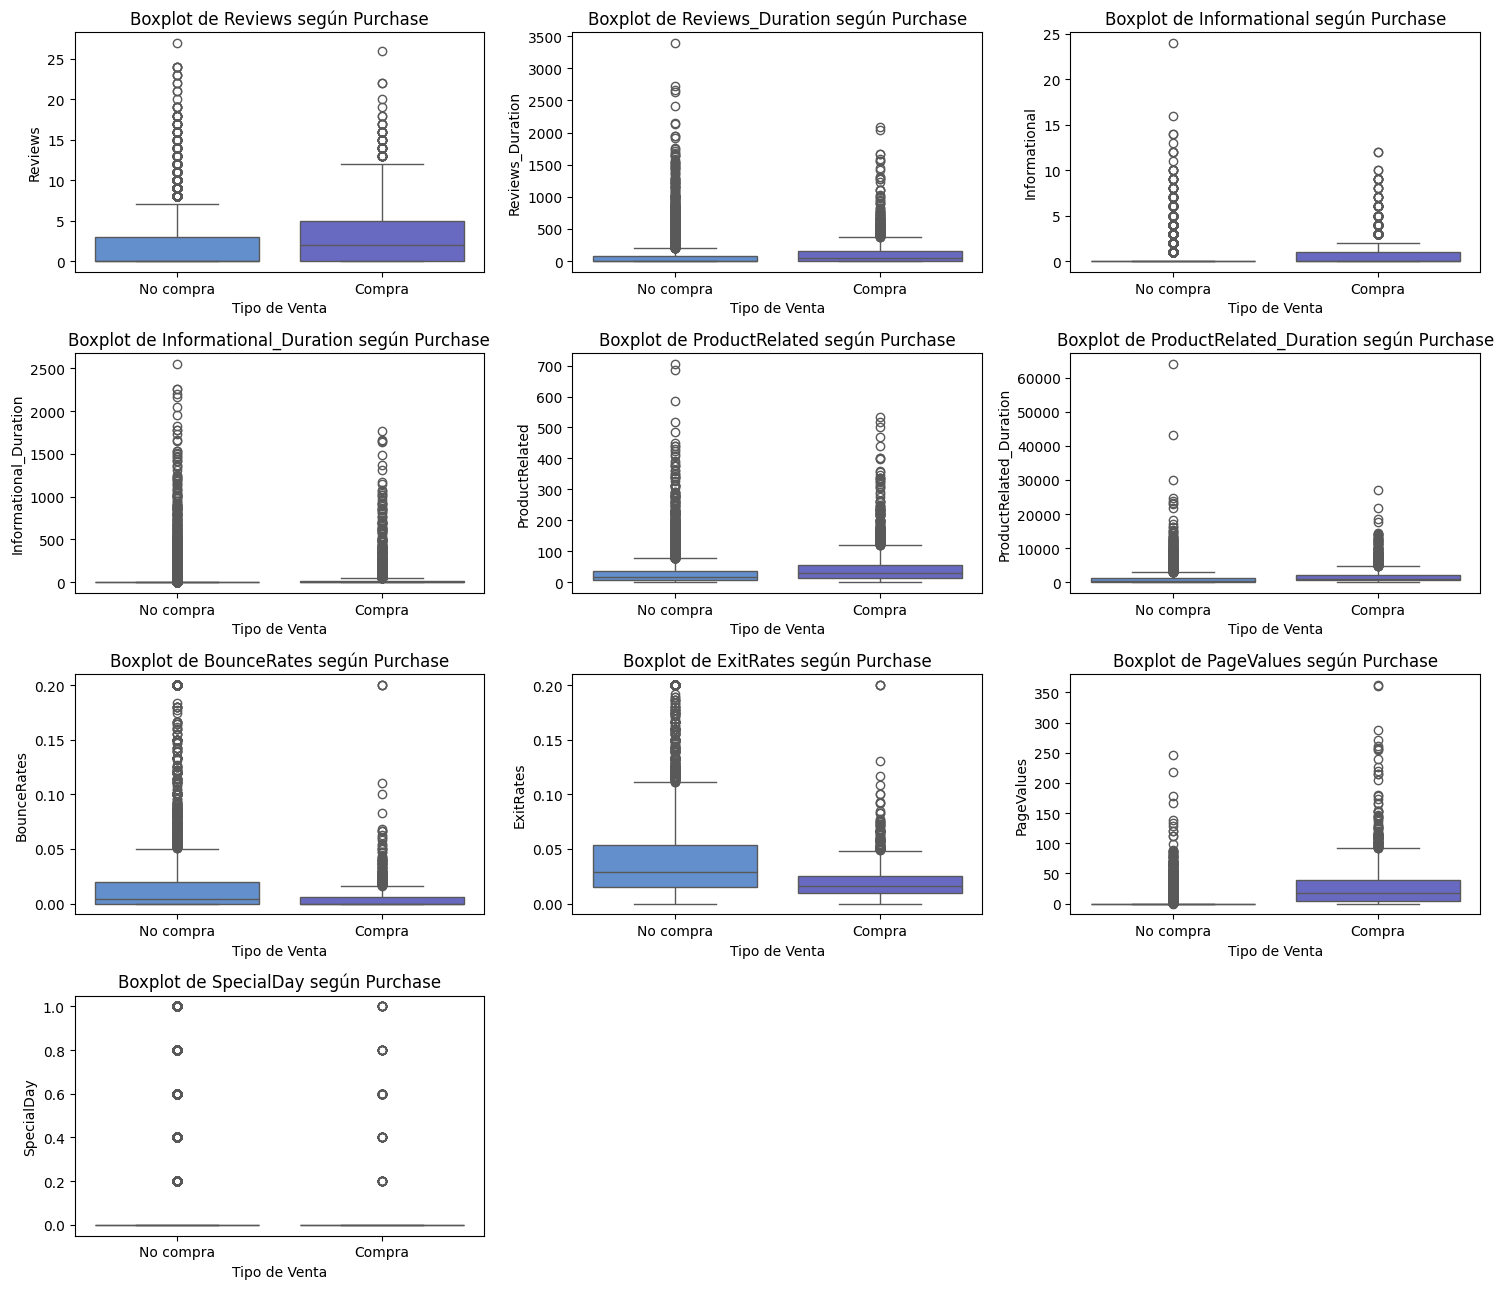

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(15, 13), facecolor='none')

# Definir colores para las clases 'Compra' y 'No Compra'
colors = ['#518CDE', '#595BD1']

# Trazar boxplots para las variables numéricas con ejes y diferentes
for i, var in enumerate(num_var):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df_ventas['Purchase'].replace({0: 'No compra', 1: 'Compra'}), y=var, data=df_ventas, palette=colors)
    plt.title('Boxplot de ' + var + ' según Purchase')
    plt.xlabel('Tipo de Venta')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

In [ ]:
# Filtrar solo las variables numéricas y la variable objetivo
numeric_df = df_ventas[num_var + ['Purchase']]

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Mostrar la matriz de correlación
correlation_matrix

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Purchase
Reviews,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.138917
Reviews_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,-0.082305


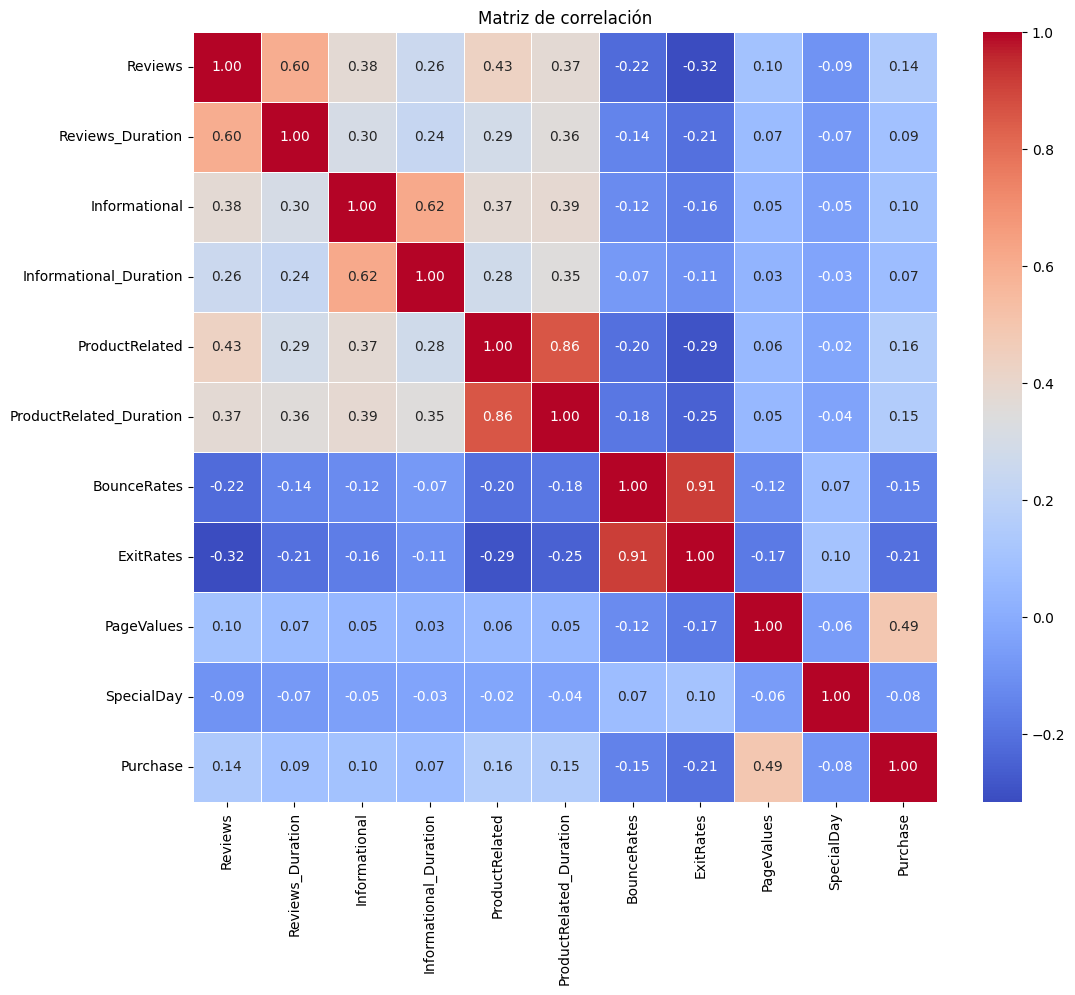

In [ ]:
# Visualizar la matriz de correlación usando un mapa de calor (heatmap) de seaborn
plt.figure(figsize=(12, 10), facecolor='none')
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

*   La variable "PageValues" tiene una correlación de 0.49 con "Purchase", lo que sugiere una correlación moderadamente fuerte.

*   Las variables 'Reviews' y 'Reviews_Duration' tienen una correlación relativamente alta entre sí (0.60), lo que sugiere que podrían medir aspectos similares del comportamiento del usuario. En este caso, podríamos considerar eliminar una de ellas para evitar la redundancia en el modelo.

*   'ProductRelated' y 'ProductRelated_Duration' también tienen una correlación alta (0.86). De manera similar, podríamos considerar eliminar una de ellas para evitar la multicolinealidad.

*   'BounceRates' y 'ExitRates' tienen una correlación bastante alta (0.91). Podríamos considerar eliminar una de ellas para evitar la multicolinealidad.

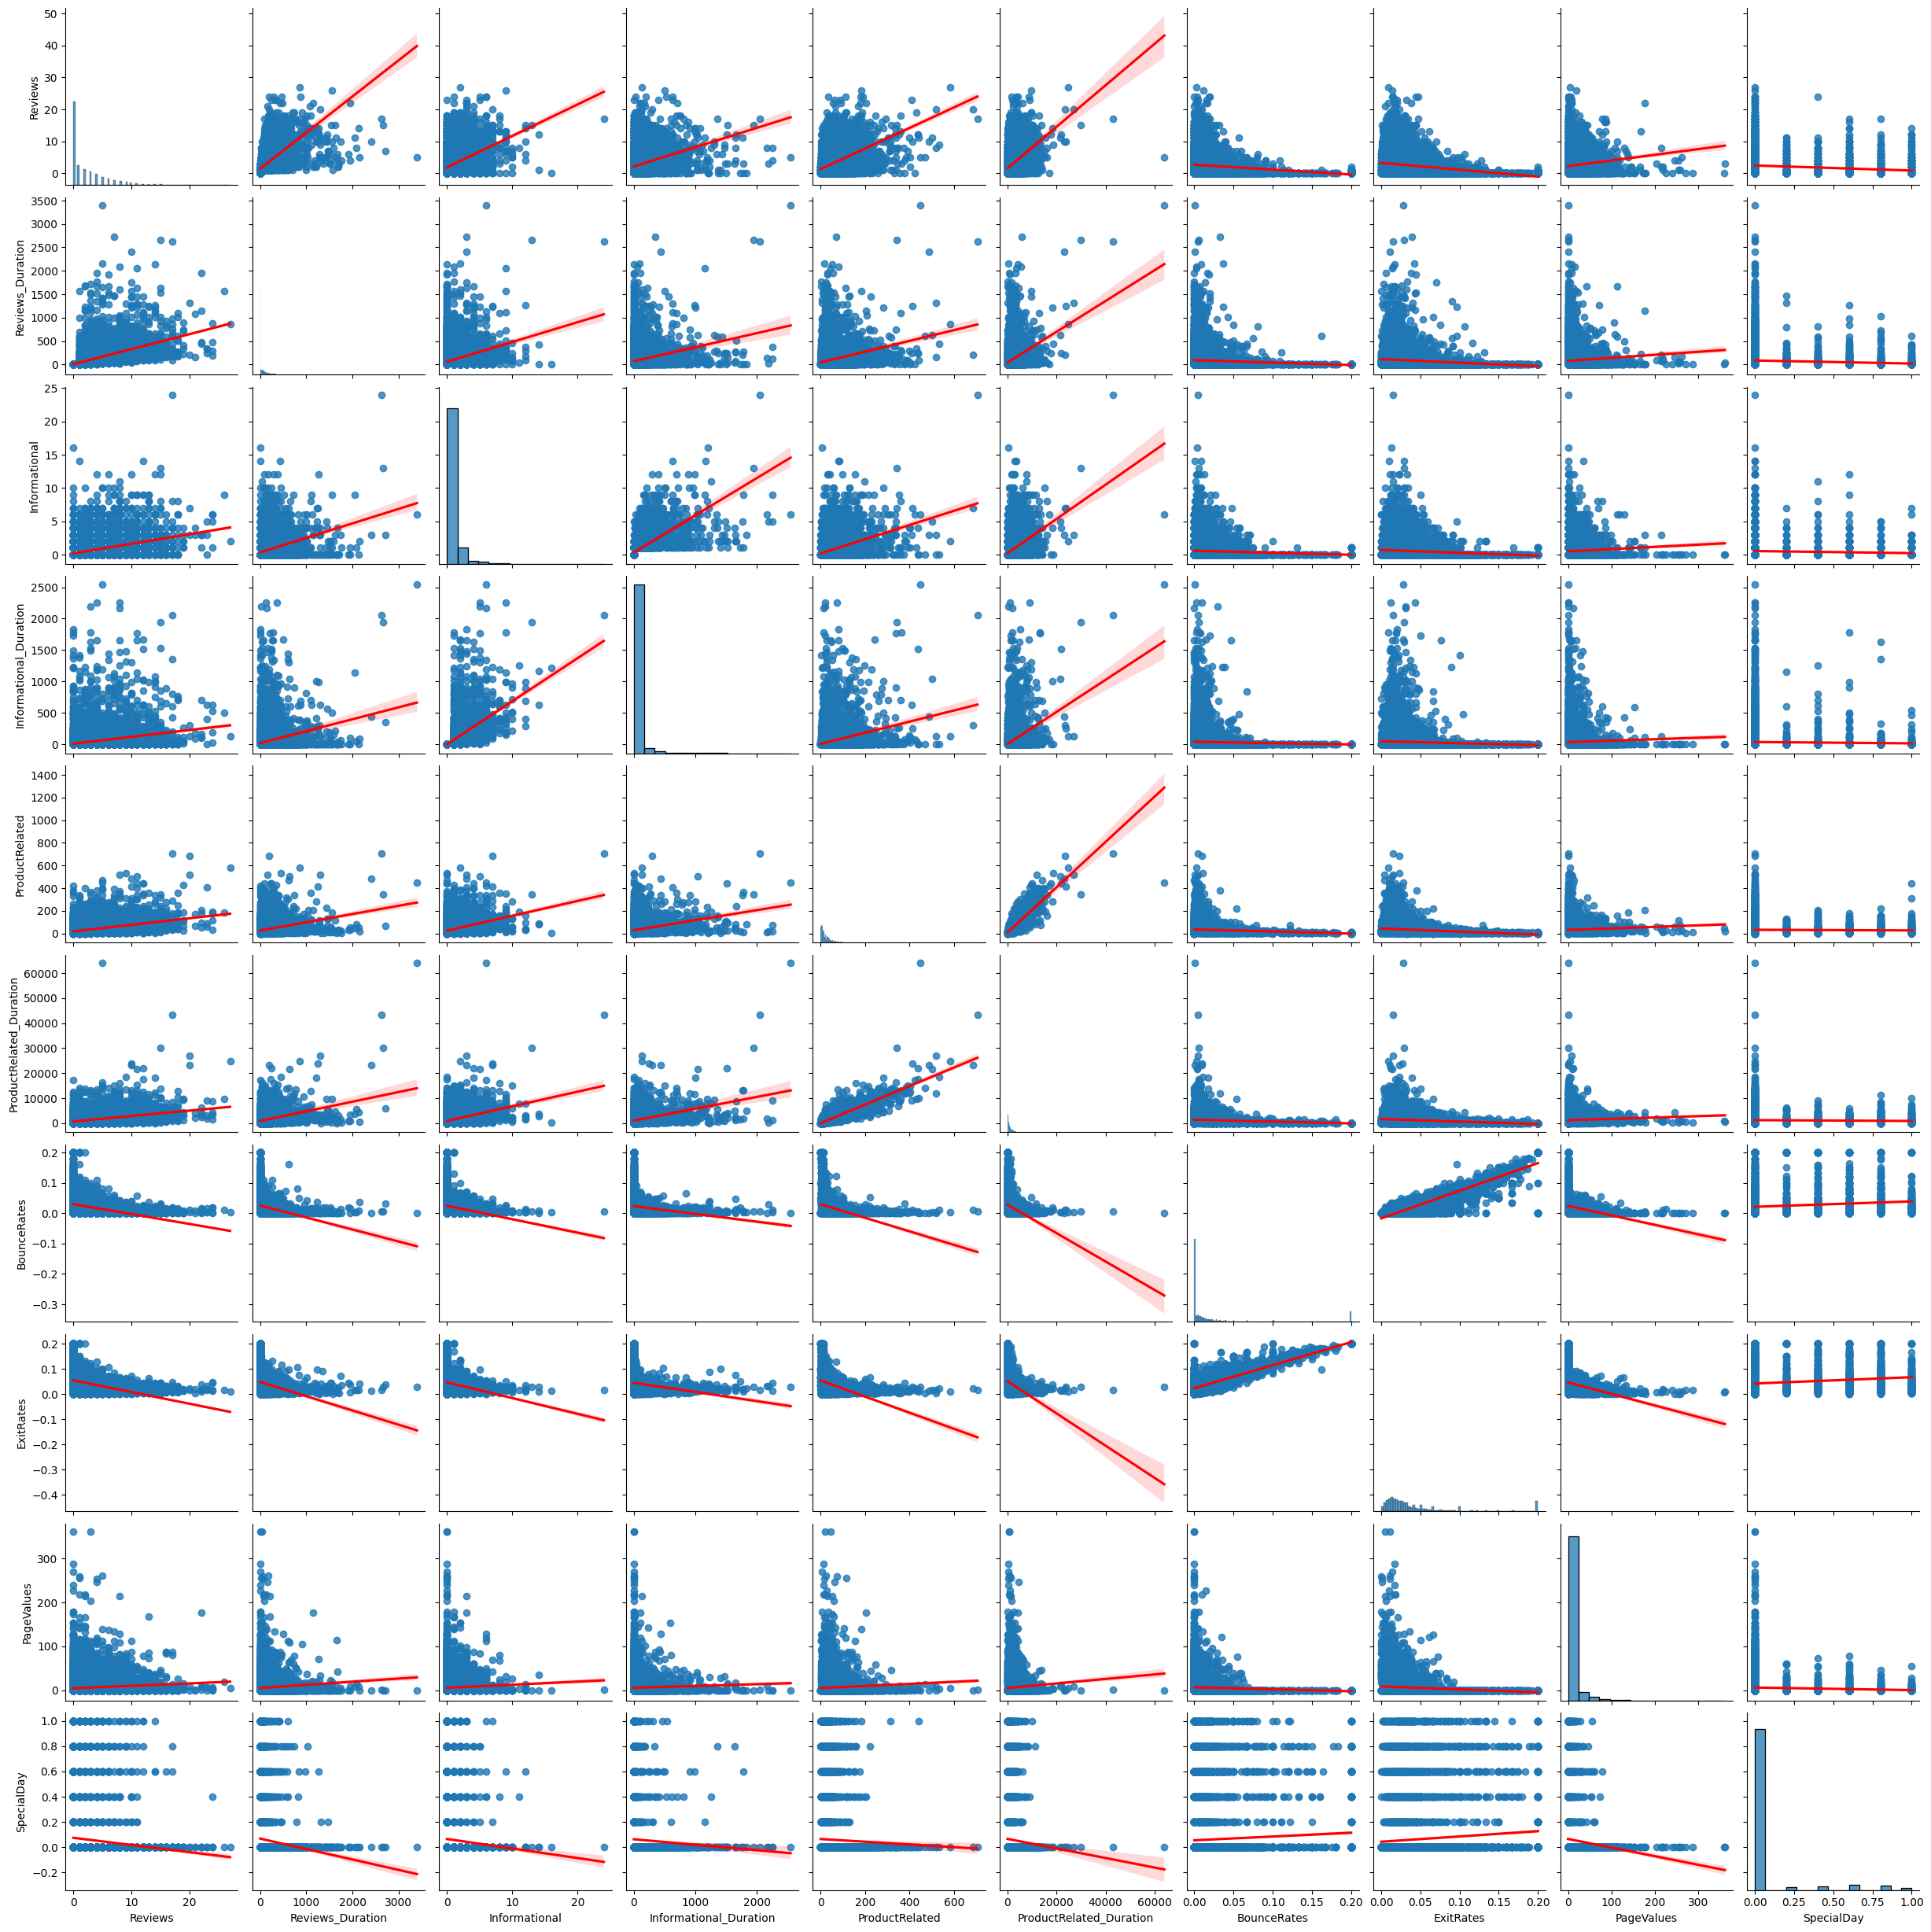

<Figure size 640x480 with 0 Axes>

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_df = df_ventas[num_var]

# Crear un gráfico de pares con líneas de regresión rojas
sns.pairplot(numeric_df, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.figure(facecolor='none')  # Establecer el fondo como transparente

plt.show()

Se podría considerar eliminar variables basándonos en el correlograma, es importante evaluar la correlación de cada variable con la variable objetivo "Purchase" y la correlación entre las variables entre sí.

**Variables altamente correlacionadas con otras:**

"ProductRelated" y "ProductRelated_Duration" tienen una correlación alta de 0.860 se podría considerar eliminar una de ellas, ya que representan aspectos similares del comportamiento del usuario en el sitio web.


**Variables con baja correlación con la variable objetivo:**

"SpecialDay" tiene correlaciones relativamente bajas con la variable objetivo "Purchase". Además su correlación con otras variables también es baja, se podría considerar para la eliminación.


### **2.3.2. Variables Categóricas**

In [ ]:
cat_var = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month']
# Crear un diccionario para almacenar los recuentos de compras y no compras para cada categoría
purchase_counts = {}

# Calcular los recuentos para cada variable categórica
for col in cat_var:
    counts = df_ventas.groupby([col, 'Purchase']).size().unstack(fill_value=0)
    purchase_counts[col] = counts

# Construir un DataFrame a partir del diccionario
purchase_counts_df = pd.concat(purchase_counts.values(), keys=purchase_counts.keys()).reset_index()

# Renombrar las columnas y establecer los nombres de las categorías como índices
purchase_counts_df.columns = ['Variable', 'Purchase', 'No Compra', 'Compra']
purchase_counts_df.set_index(['Variable', 'Purchase'], inplace=True)

purchase_counts_df

No Compra  Compra
Variable         Purchase                   
OperatingSystems 1              2206     379
                 2              5446    1155
                 3              2287     268
                 4               393      85
                 5                 5       1
...                              ...     ...
Month            8               357      76
                 9               362      86
                 10              434     115
                 11             2238     760
                 12             1511     216

[65 rows x 2 columns]

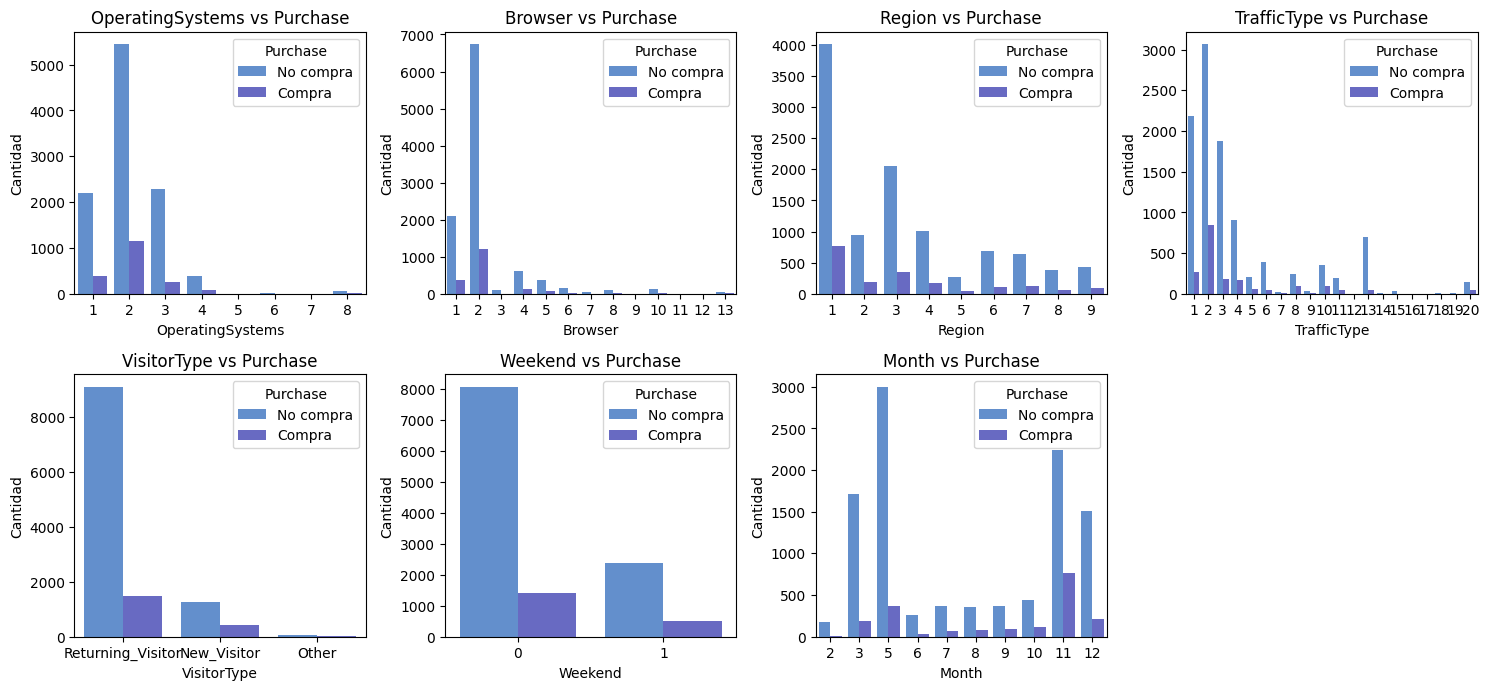

In [ ]:
# Definir los colores personalizados
colors = ['#518CDE', '#595BD1']

# Definir el tamaño de la figura y la cuadrícula
plt.figure(figsize=(15, 10), facecolor= 'None')

# Crear gráficos de barras agrupadas para cada variable categórica en una cuadrícula
rows = 3
cols = 4

for i, col in enumerate(cat_var):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=col, hue='Purchase', data=df_ventas, palette=colors)
    plt.title(f'{col} vs Purchase')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=0)
    plt.legend(title='Purchase', labels=['No compra', 'Compra'])

# Ajustar el espaciado entre los gráficos
plt.tight_layout()
plt.show()

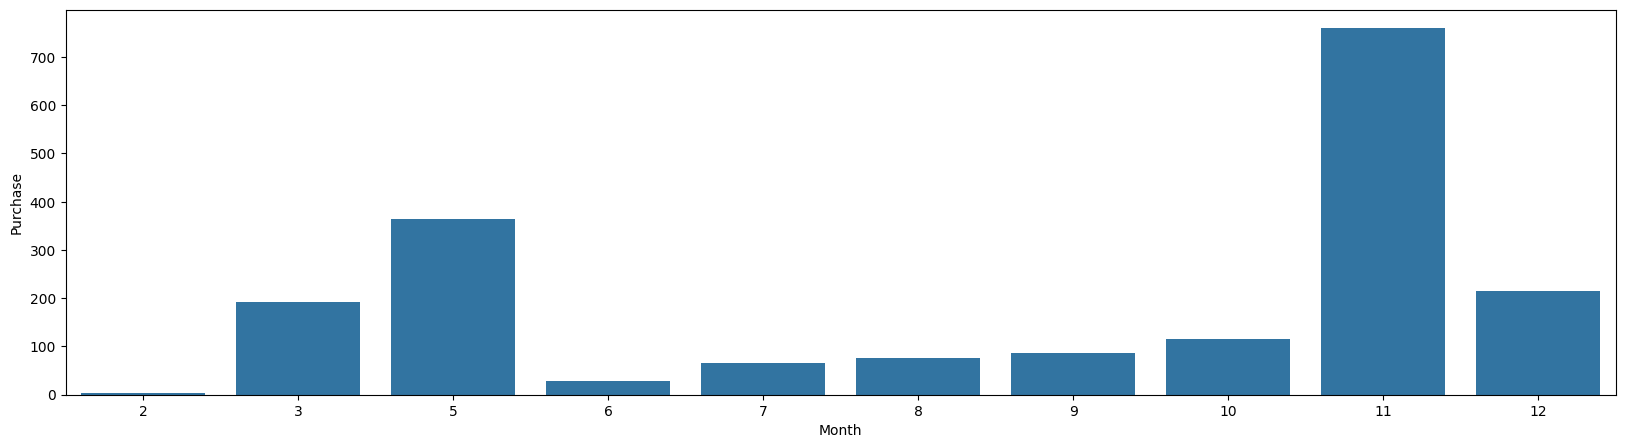

In [ ]:
# Análisis de las ventas en función de
charges = df_ventas['Purchase'].groupby(df_ventas.Month).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

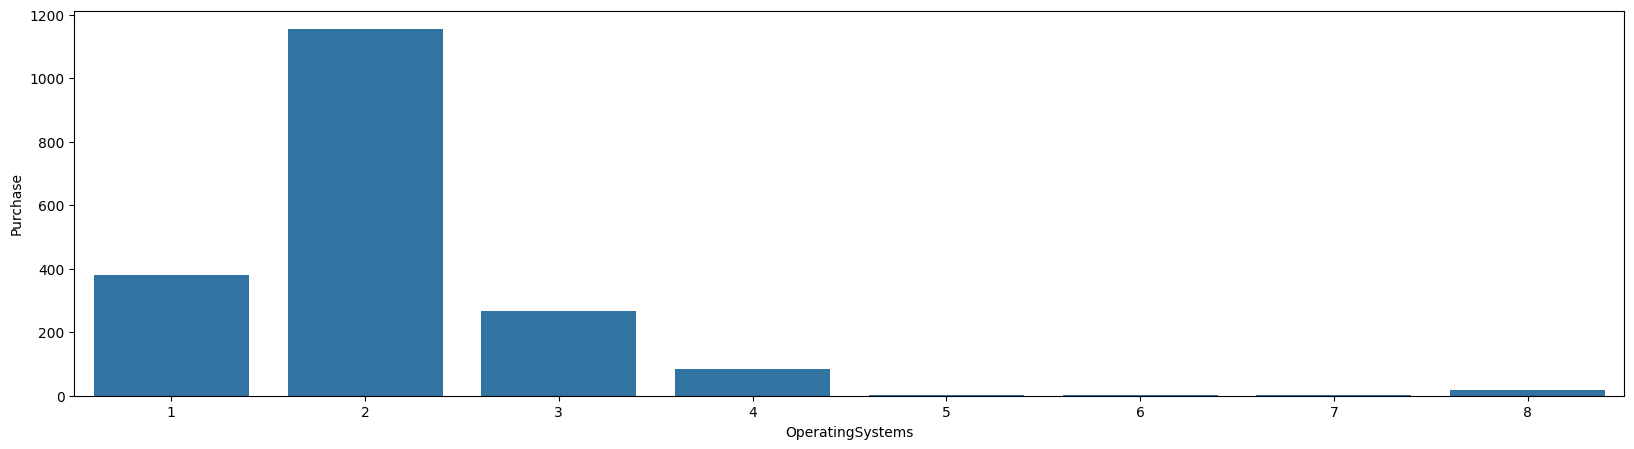

In [ ]:
# Análisis de las ventas en función de
charges = df_ventas['Purchase'].groupby(df_ventas.OperatingSystems).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

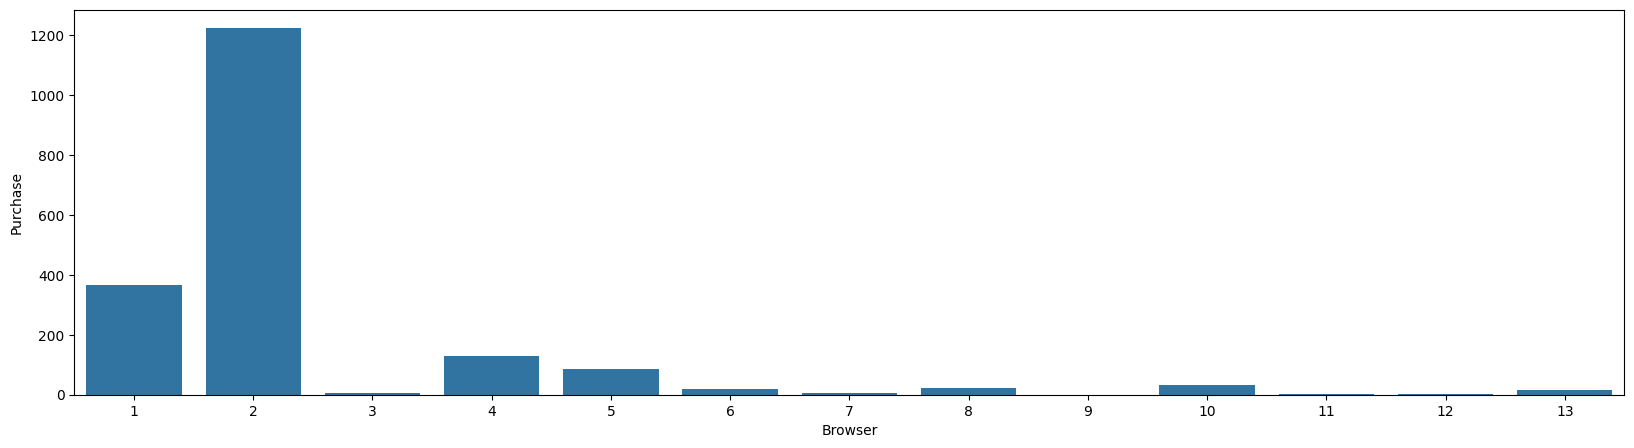

In [ ]:
# Análisis de las ventas en función de
charges = df_ventas['Purchase'].groupby(df_ventas.Browser).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

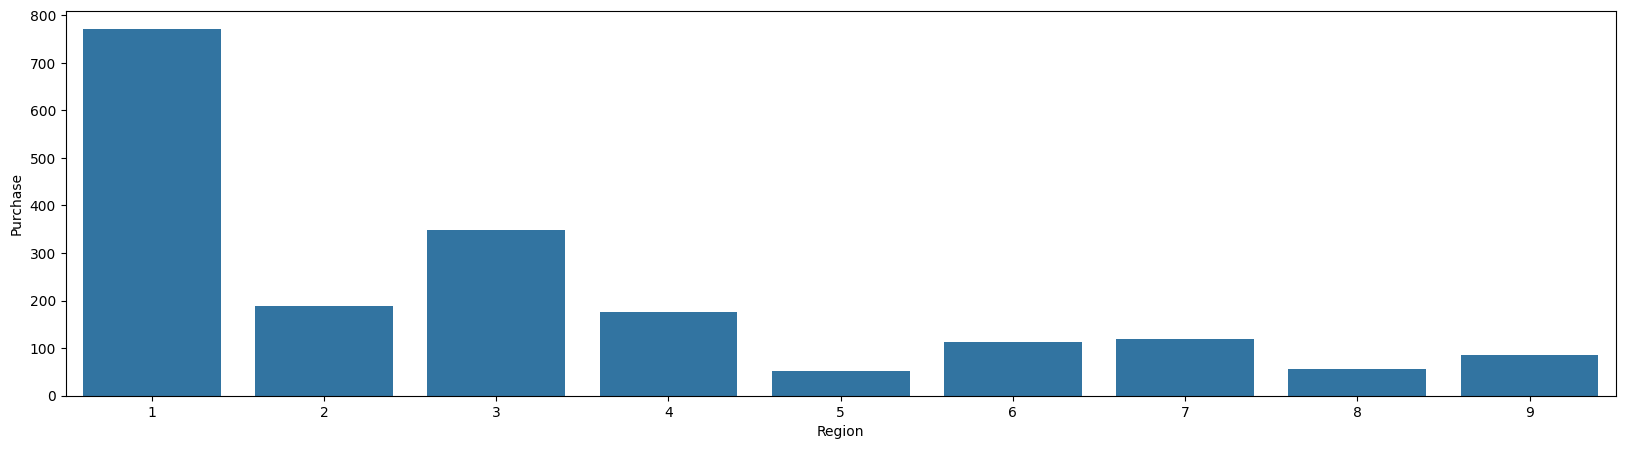

In [ ]:
# Análisis de las ventas en función de
charges = df_ventas['Purchase'].groupby(df_ventas.Region).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

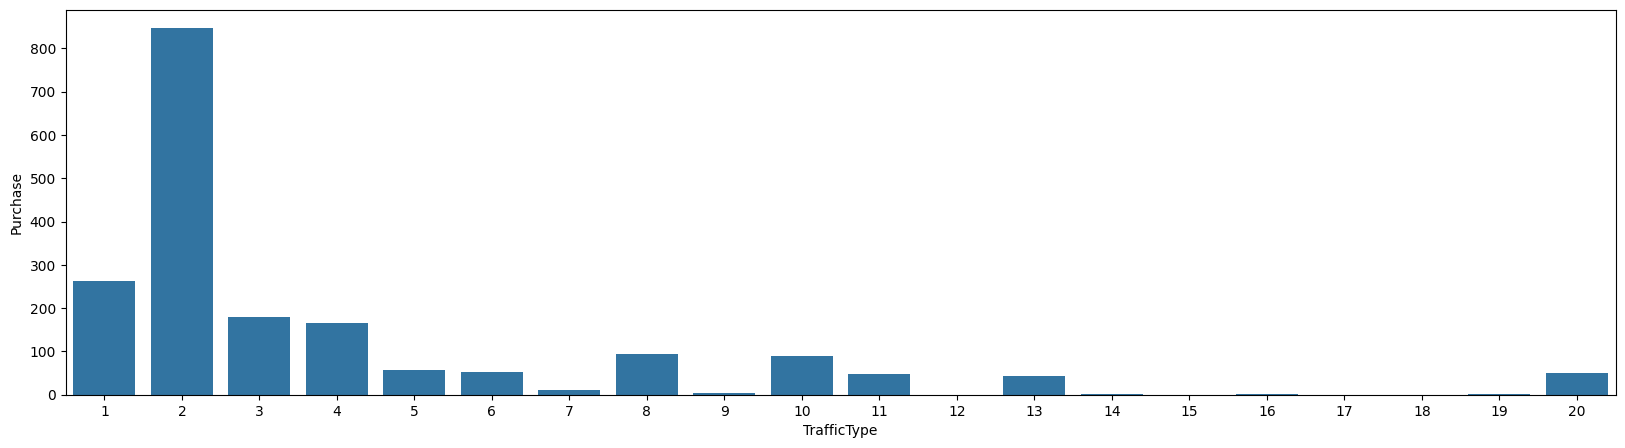

In [ ]:
# Análisis de las ventas en función de
charges = df_ventas['Purchase'].groupby(df_ventas.TrafficType).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

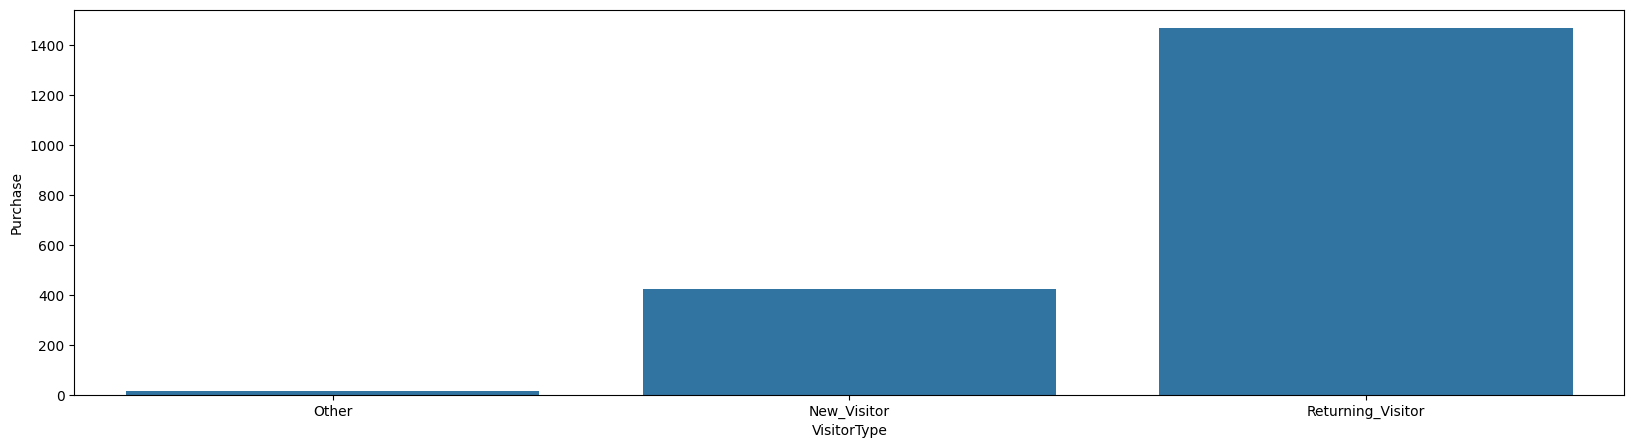

In [ ]:
# Análisis de las ventas en función de
charges = df_ventas['Purchase'].groupby(df_ventas.VisitorType).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

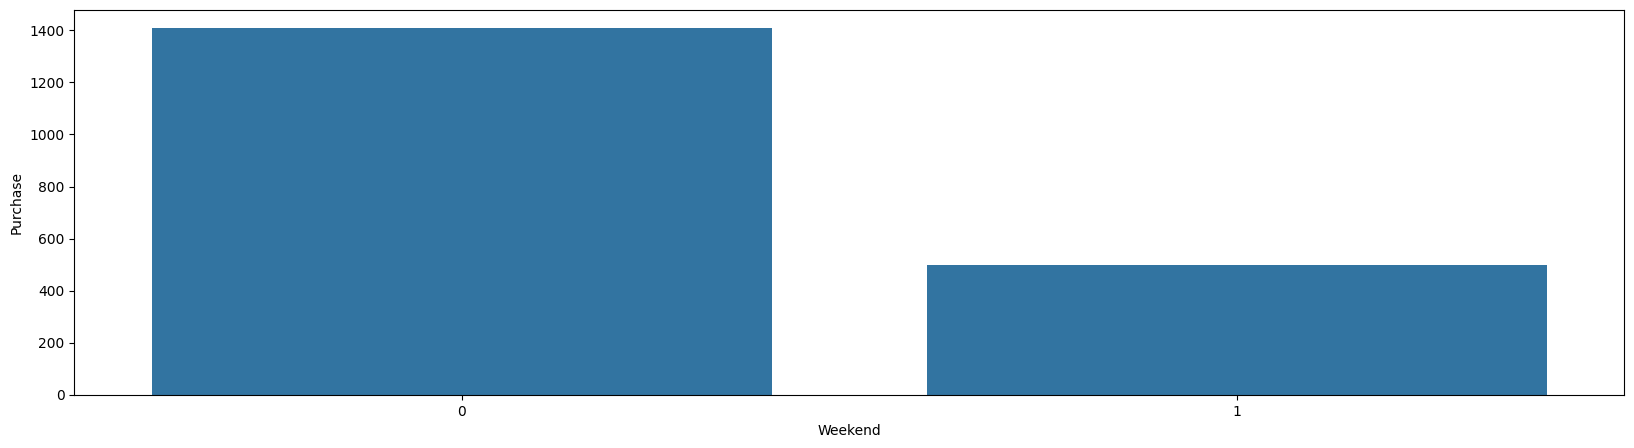

In [ ]:
# Análisis de las ventas en función de
charges = df_ventas['Purchase'].groupby(df_ventas.Weekend).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

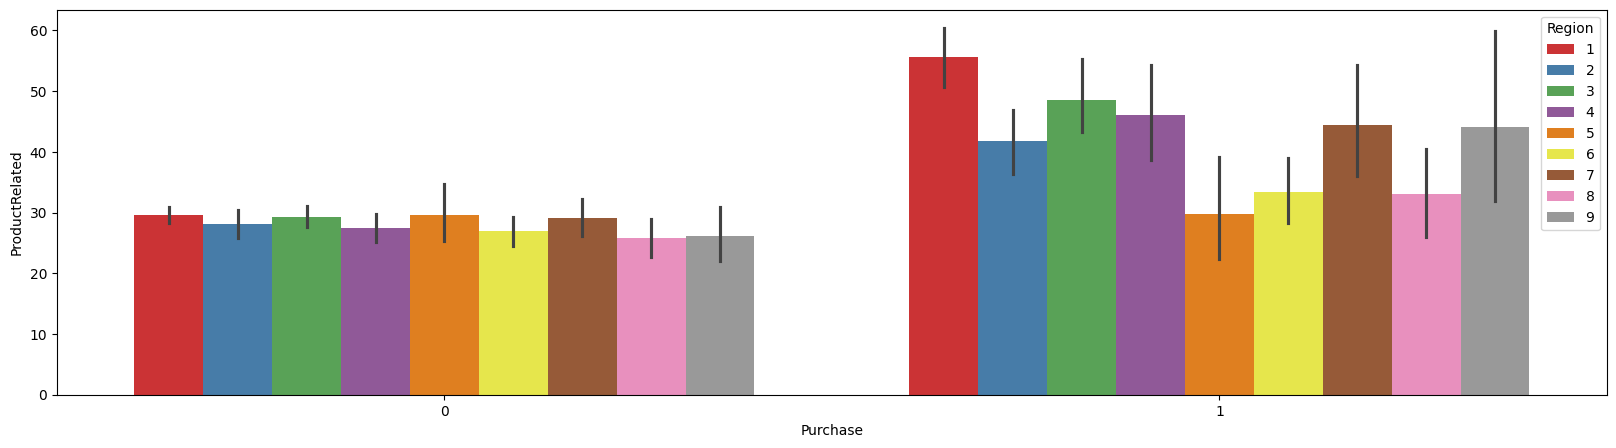

In [ ]:
# Análisis de los costos en función de la región y el numero de hijos
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'Purchase', y = 'ProductRelated', hue = 'Region', data = df_ventas, palette='Set1')

In [ ]:
from scipy.stats import chi2_contingency

cat_var2 = cat_var = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Purchase']

# Crear un DataFrame solo con las variables categóricas y la variable objetivo "Purchase"
df_categoricas = df_ventas[cat_var2]

# Crear un DataFrame para almacenar los resultados de la prueba chi-cuadrado
chi2_results = pd.DataFrame(columns=['Variable', 'Chi2', 'P-value', 'Significativo'])

# Calcular el estadístico chi-cuadrado y el valor p para cada variable categórica
for columna in cat_var2:
    crosstab = pd.crosstab(df_categoricas[columna], df_categoricas['Purchase'])
    chi2, p_value, *_ = chi2_contingency(crosstab)
    significativo = 'Sí' if p_value < 0.05 else 'No'
    chi2_results = chi2_results.append({'Variable': columna, 'Chi2': chi2, 'P-value': p_value, 'Significativo': significativo}, ignore_index=True)

# Mostrar los resultados
chi2_results

,Variable,Chi2,P-value,Significativo
0,Month,384.934762,2.238786e-77,Sí
1,OperatingSystems,75.027056,1.416094e-13,Sí
2,Browser,27.715299,6.087543e-03,Sí
3,Region,9.252751,3.214250e-01,No
4,TrafficType,373.145565,1.652735e-67,Sí
5,VisitorType,135.251923,4.269904e-30,Sí
6,Weekend,10.390978,1.266325e-03,Sí
7,Purchase,12322.355847,0.000000e+00,Sí


De acuerdo con los resultados la única variable que no se relaciona puede ser la variable asociada a la región, por lo que se puede eliminar dicha variable.

# **3. Actualización de los Datos**

## **3.1. Dummizar las variables**

In [ ]:
cat_var1 = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']

# Obtén variables dummy solo para las columnas especificadas
df_dummies = pd.get_dummies(df_ventas[cat_var1], columns=cat_var1)

# Combina las variables dummy con el DataFrame original, eliminando las columnas originales
df_ventas1 = pd.concat([df_ventas.drop(cat_var1, axis=1), df_dummies], axis=1)

# Añade la columna 'Purchase' del DataFrame original a df_ventas
df_ventas1['Purchase'] = df_ventas['Purchase']

# Muestra la información del DataFrame resultante
df_ventas1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Reviews                        12330 non-null  int64  
 1   Reviews_Duration               12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Month                          12330 non-null  int64  
 11  Weekend                        12330 non-null  int64  
 12  Purchase                       12330 non-null 

In [ ]:
# Mover la columna 'Purchase' al principio del DataFrame
purchase_column = df_ventas1.pop('Purchase')
df_ventas1.insert(0, 'Purchase', purchase_column)

# Mostrar el DataFrame resultante
df_ventas1.head()

,Purchase,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,...,0,0,0,0,0,0,0,0,0,1


## **3.2. Estandarizar las variables**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas que deseas estandarizar
columnas_a_estandarizar = ['Reviews', 'Reviews_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','BounceRates','ExitRates', 'PageValues']

# Crear el MinMaxScaler
scaler = MinMaxScaler()

# Separar las características (X) y la variable objetivo (y)
df_scaled = df_ventas1.copy()

# Aplicar el scaler solo a las columnas seleccionadas
df_scaled[columnas_a_estandarizar] = scaler.fit_transform(df_scaled[columnas_a_estandarizar])

# Ahora las columnas seleccionadas están estandarizadas en el rango [0, 1]

In [ ]:
df_scaled.describe()

,Purchase,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.154745,0.085747,0.023779,0.020982,0.013522,0.045009,0.018676,0.110957,0.215364,0.016279,...,0.001054,0.003082,0.000243,0.000081,0.000811,0.001379,0.016058,0.137388,0.006894,0.855718
std,0.361676,0.123029,0.052013,0.052923,0.055209,0.063086,0.029913,0.242442,0.242983,0.051328,...,0.032455,0.055432,0.015597,0.009006,0.028468,0.037107,0.125705,0.344271,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.009929,0.002878,0.000000,0.071429,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.037037,0.002207,0.000000,0.000000,0.025532,0.009362,0.015562,0.125782,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.148148,0.027438,0.000000,0.000000,0.053901,0.022887,0.084063,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **4. Preparar los datos** Datos Originales

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separar las características (X) y la variable objetivo (y)
X = df_ventas1.drop(['Purchase'], axis=1)
y = df_ventas1['Purchase']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

#Imprimir tamaño dataset
print("Tamaño del conjunto de entrenamiento: ", X_train.shape)
print("Tamaño del conjunto de validación", X_test.shape)


Tamaño del conjunto de entrenamiento:  (9864, 65)
Tamaño del conjunto de validación (2466, 65)


**Función para evaluar el modelo**

In [ ]:
def eval_model(y_train_pred, y_test_pred):

  #============================= EVALUACIÓN ======================================
  # Métricas de desempeño de entrenamiento
  print("Métricas de desempeño sobre el conjunto de entrenamiento:")
  print("Accuracy Score: {:.2f}%".format(accuracy_score(y_train, y_train_pred)*100))
  print("Classification Report:")
  print(classification_report(y_train, y_train_pred))

  # Métricas de desempeño de validación
  print("\nMétricas de desempeño sobre el conjunto de validación:")
  print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test, y_test_pred)*100))
  print("Classification Report:")
  print(classification_report(y_test, y_test_pred))

  #========================= MATRIZ DE CONFUSIÓN =================================

  # Crear una figura y ejes de subgráficos
  fig, axes = plt.subplots(1, 2, figsize=(12, 5), facecolor='none')

  # Matriz de confusión de entrenamiento
  confusion_train = confusion_matrix(y_train, y_train_pred)

  # Matriz de confusión de validación
  confusion_test = confusion_matrix(y_test, y_test_pred)

  # Matriz de confusión de entrenamiento
  sns.heatmap(confusion_train, annot=True, cmap='Blues', fmt='d', ax=axes[0])
  axes[0].set_title('Matriz de Confusión (Entrenamiento)')
  axes[0].set_xlabel('Predicción')
  axes[0].set_ylabel('Valor Real')

  # Matriz de confusión de validación
  sns.heatmap(confusion_test, annot=True, cmap='Blues', fmt='d', ax=axes[1])
  axes[1].set_title('Matriz de Confusión (Validación)')
  axes[1].set_xlabel('Predicción')
  axes[1].set_ylabel('Valor Real')

  # Ajustar espaciado entre subgráficos
  plt.tight_layout()

  # Mostrar la gráfica
  plt.show()

## ***Modelo Regresión Logística*** - Base

In [ ]:
# Separar las características (X) y la variable objetivo (y)
X_scaled = df_scaled.drop(['Purchase'], axis=1)
y_scaled = df_scaled['Purchase']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=28)

#Imprimir tamaño dataset
print("Tamaño del conjunto de entrenamiento: ", X_train.shape)
print("Tamaño del conjunto de validación", X_test.shape)

Tamaño del conjunto de entrenamiento:  (9864, 65)
Tamaño del conjunto de validación (2466, 65)


Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 82.55%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      8319
           1       0.47      0.76      0.58      1545

    accuracy                           0.83      9864
   macro avg       0.71      0.80      0.73      9864
weighted avg       0.87      0.83      0.84      9864


Métricas de desempeño sobre el conjunto de validación:
Accuracy Score: 81.79%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      2103
           1       0.43      0.75      0.55       363

    accuracy                           0.82      2466
   macro avg       0.69      0.79      0.72      2466
weighted avg       0.87      0.82      0.84      2466



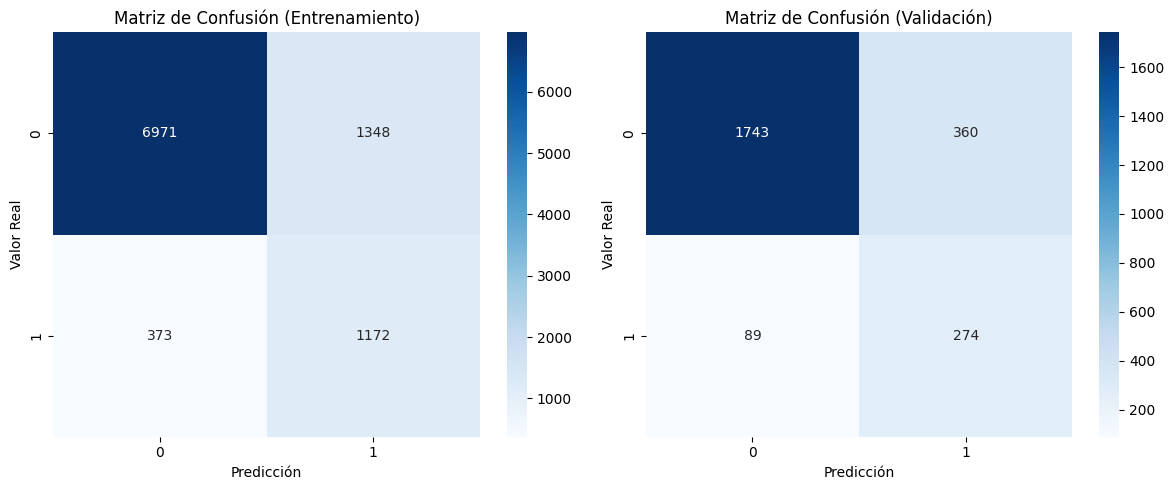

In [ ]:
# Crear el modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=28, class_weight='balanced')

# Entrenar el modelo
logistic_model.fit(X_train, y_train)

# Predecir sobre los datos de entrenamiento y prueba
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

eval_model(y_train_pred, y_test_pred)

## ***Modelo RandomForest*** - Base

Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8319
           1       1.00      1.00      1.00      1545

    accuracy                           1.00      9864
   macro avg       1.00      1.00      1.00      9864
weighted avg       1.00      1.00      1.00      9864


Métricas de desempeño sobre el conjunto de validación:
Accuracy Score: 90.11%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2103
           1       0.75      0.49      0.59       363

    accuracy                           0.90      2466
   macro avg       0.83      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466



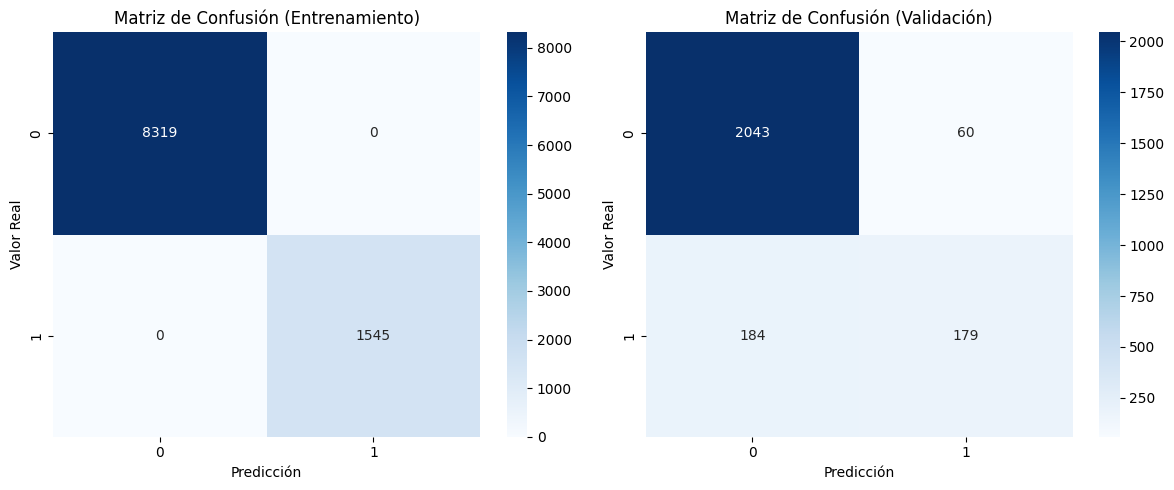

In [ ]:
#Inicializar las variables

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

#RANDOM FOREST BASE
RanFor_base = RandomForestClassifier(class_weight='balanced', random_state=28, n_jobs=-1)

RanFor_base.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_base = RanFor_base.predict(X_train)
y_test_base = RanFor_base.predict(X_test)

# Evaluar el modelo
eval_model(y_train_base, y_test_base)

**Importancia de las Variables**

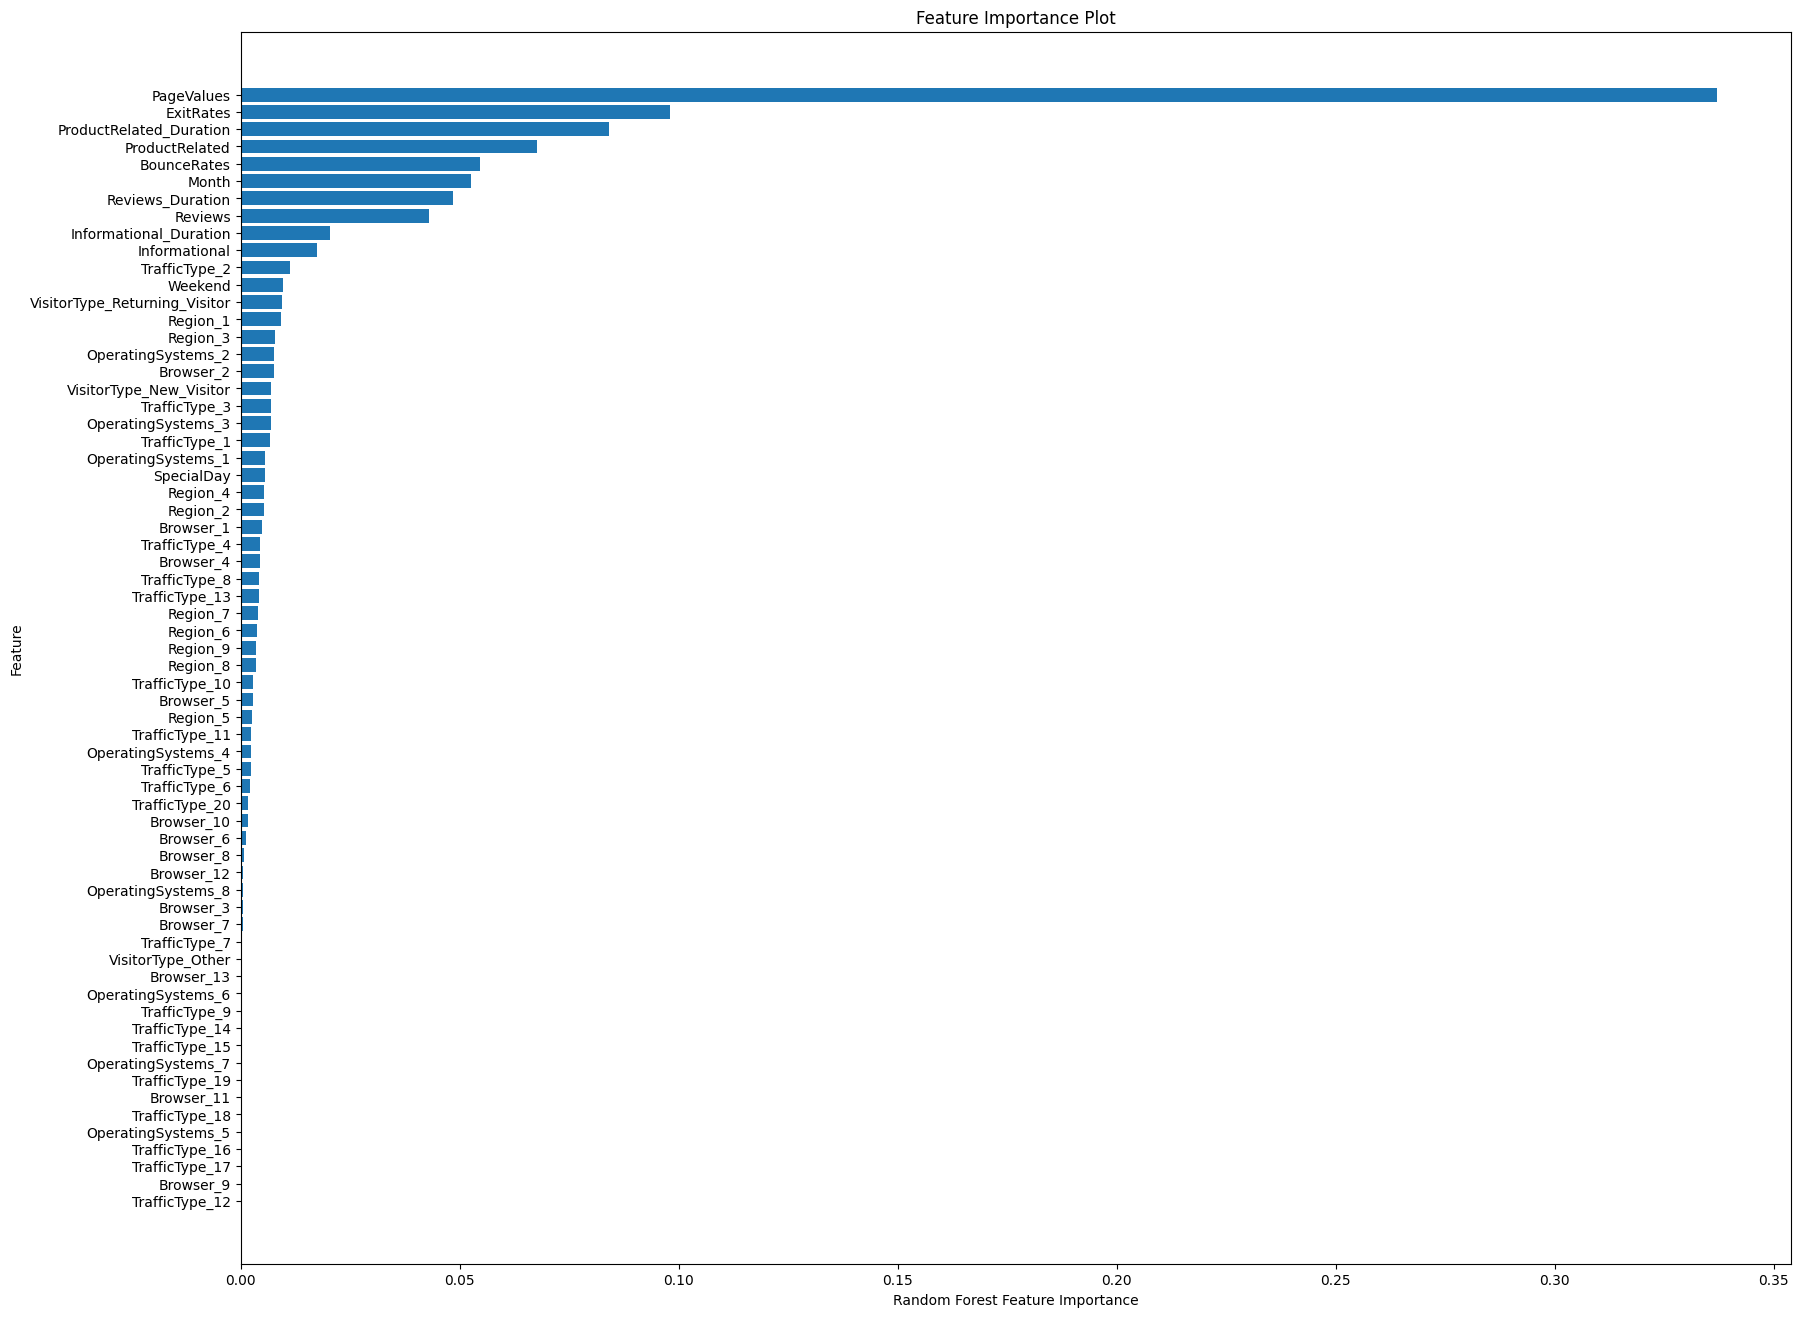

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 16))

# Calcular la importancia de las variables
importance = RanFor_base.feature_importances_
sorted_idx = RanFor_base.feature_importances_.argsort()

# Crear el gráfico de barras
plt.barh(X.columns[sorted_idx], importance[sorted_idx])

# Configurar etiquetas y título
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")

# Mostrar el gráfico
plt.show()

## ***Modelo Gradient Boosting*** - Base

Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 91.68%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      8319
           1       0.78      0.65      0.71      1545

    accuracy                           0.92      9864
   macro avg       0.86      0.81      0.83      9864
weighted avg       0.91      0.92      0.91      9864


Métricas de desempeño sobre el conjunto de validación:
Accuracy Score: 90.27%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2103
           1       0.70      0.60      0.64       363

    accuracy                           0.90      2466
   macro avg       0.82      0.78      0.79      2466
weighted avg       0.90      0.90      0.90      2466



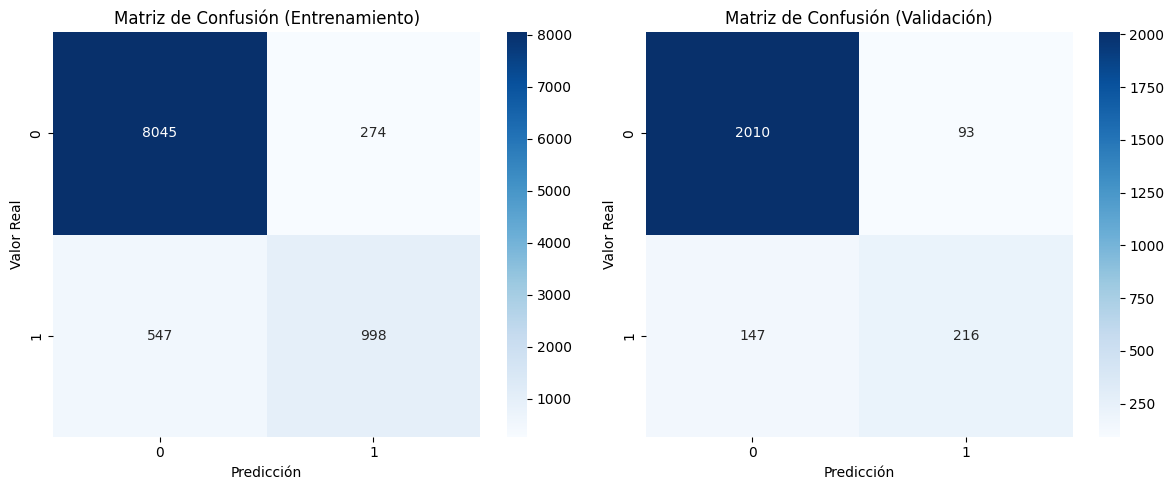

In [ ]:
#Inicializar las variables

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

#GRADIENT BOOSTING

from sklearn.ensemble import GradientBoostingClassifier

gboos = GradientBoostingClassifier(n_estimators = 100, random_state = 28)

gboos.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_gboos = gboos.predict(X_train)
y_test_base_gboos = gboos.predict(X_test)

# Evaluar el modelo
eval_model(y_train_gboos, y_test_base_gboos)

## ***Modelo Gradient Boosting Xtreme*** - Base

Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 98.60%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8319
           1       0.99      0.92      0.95      1545

    accuracy                           0.99      9864
   macro avg       0.99      0.96      0.97      9864
weighted avg       0.99      0.99      0.99      9864


Métricas de desempeño sobre el conjunto de validación:
Accuracy Score: 89.78%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2103
           1       0.68      0.57      0.62       363

    accuracy                           0.90      2466
   macro avg       0.81      0.76      0.78      2466
weighted avg       0.89      0.90      0.89      2466



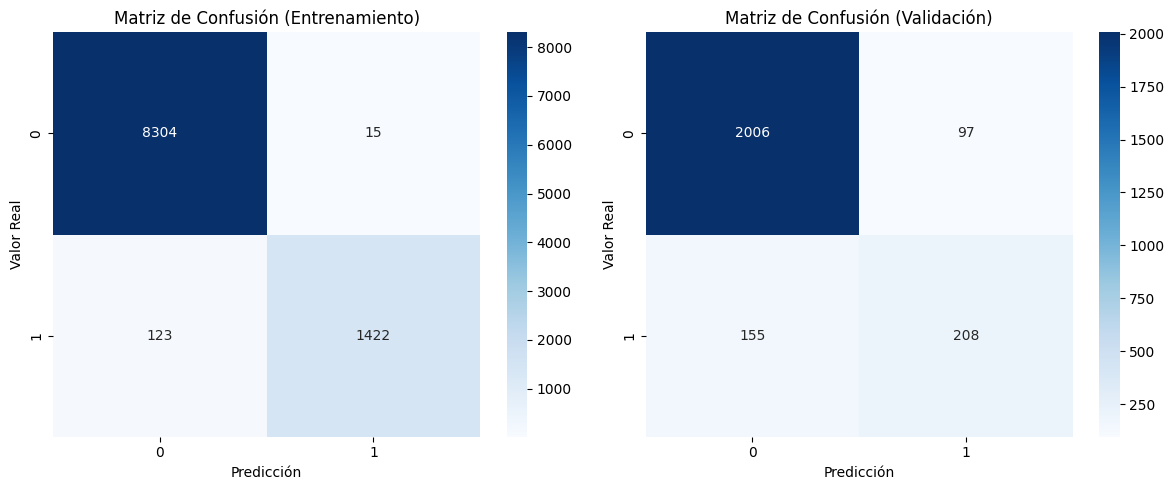

In [ ]:
#Inicializar las variables

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

#GRADIENT BOOSTING XTREME

from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100, random_state = 28)

xgb.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_xgb = xgb.predict(X_train)
y_test_base_xgb = xgb.predict(X_test)

#Evaluar el modelo
eval_model(y_train_xgb, y_test_base_xgb)

## ***Modelo Super Vector Machine***

In [ ]:
#Inicializar las variables

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

#SUPER VECTOR MACHINE

from sklearn.svm import SVC

svm = SVC(C = 1.5, kernel = 'linear', class_weight = 'balanced', max_iter =-1, random_state=28)

svm.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_svm = svm.predict(X_train)
y_test_base_svm = svm.predict(X_test)

# Evaluar el modelo
eval_model(y_train_svm, y_test_base_svm)

## **3.3. SELECT K BEST**

In [ ]:
# Para clasificación
from sklearn.feature_selection import SelectKBest, f_classif

# Función de filtro de caracteristicas - stadis. scores
def select_kbest_classification(X,y,score_f,k):
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    new_cols = sel_kb.get_support()
    #print("Scores:\n", sel_kb.scores_, "\nP-values:\n", sel_kb.pvalues_)
    return new_cols

In [ ]:
# Obtener columnas seleciconadas - (15 caracteristicas)
skb = select_kbest_classification(X, y, f_classif, 15)

# Nuevo conjunto de datos
X_skb = X.iloc[:,skb]
print(X_skb.columns)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_skb, y, test_size=0.2, random_state=28)

Index(['Reviews', 'Reviews_Duration', 'Informational', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems_3', 'TrafficType_2',
       'TrafficType_3', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor'],
      dtype='object')


### **3.3.1. SelectKBest ajustado a Random Forest**

Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8319
           1       1.00      1.00      1.00      1545

    accuracy                           1.00      9864
   macro avg       1.00      1.00      1.00      9864
weighted avg       1.00      1.00      1.00      9864


Métricas de desempeño sobre el conjunto de validación:
Accuracy Score: 90.19%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2103
           1       0.71      0.56      0.63       363

    accuracy                           0.90      2466
   macro avg       0.82      0.76      0.79      2466
weighted avg       0.90      0.90      0.90      2466



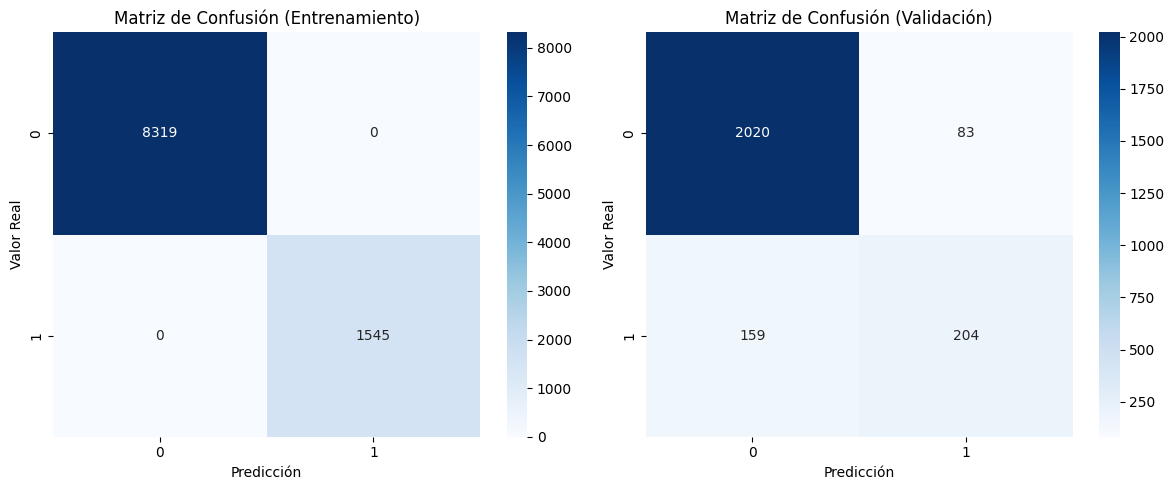

In [ ]:
RanFor_skb = RandomForestClassifier(class_weight='balanced', random_state=28, n_jobs=-1)

RanFor_skb.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_skb1 = RanFor_skb.predict(X_train)
y_test_skb1 = RanFor_skb.predict(X_test)

eval_model(y_train_skb1, y_test_skb1)

### **3.3.2. SelectKBest ajustadoa Gradient Boosting**

Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 92.95%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8319
           1       0.82      0.70      0.76      1545

    accuracy                           0.93      9864
   macro avg       0.88      0.84      0.86      9864
weighted avg       0.93      0.93      0.93      9864


Métricas de desempeño sobre el conjunto de validación:
Accuracy Score: 90.39%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2103
           1       0.70      0.61      0.65       363

    accuracy                           0.90      2466
   macro avg       0.82      0.78      0.80      2466
weighted avg       0.90      0.90      0.90      2466



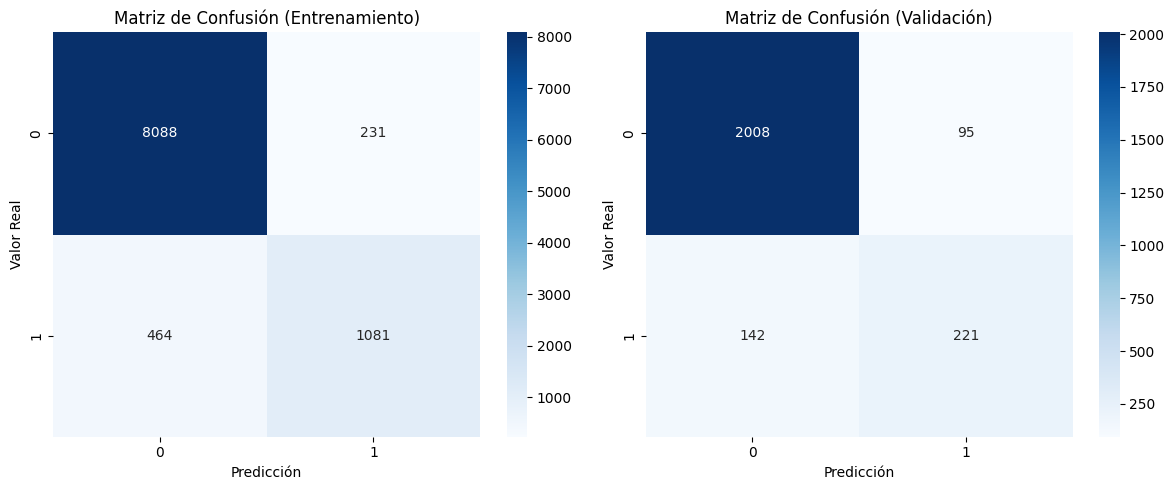

In [ ]:
gboos_skb = gboos

gboos_skb.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_skb2 = gboos_skb.predict(X_train)
y_test_skb2 = gboos_skb.predict(X_test)

eval_model(y_train_skb2, y_test_skb2)

### **3.3.3. SelectKBest ajustadoa Gradient Boosting Xtreme**

Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 92.31%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      8319
           1       0.81      0.67      0.73      1545

    accuracy                           0.92      9864
   macro avg       0.87      0.82      0.84      9864
weighted avg       0.92      0.92      0.92      9864


Métricas de desempeño sobre el conjunto de validación:
Accuracy Score: 90.19%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2103
           1       0.69      0.60      0.64       363

    accuracy                           0.90      2466
   macro avg       0.81      0.78      0.79      2466
weighted avg       0.90      0.90      0.90      2466



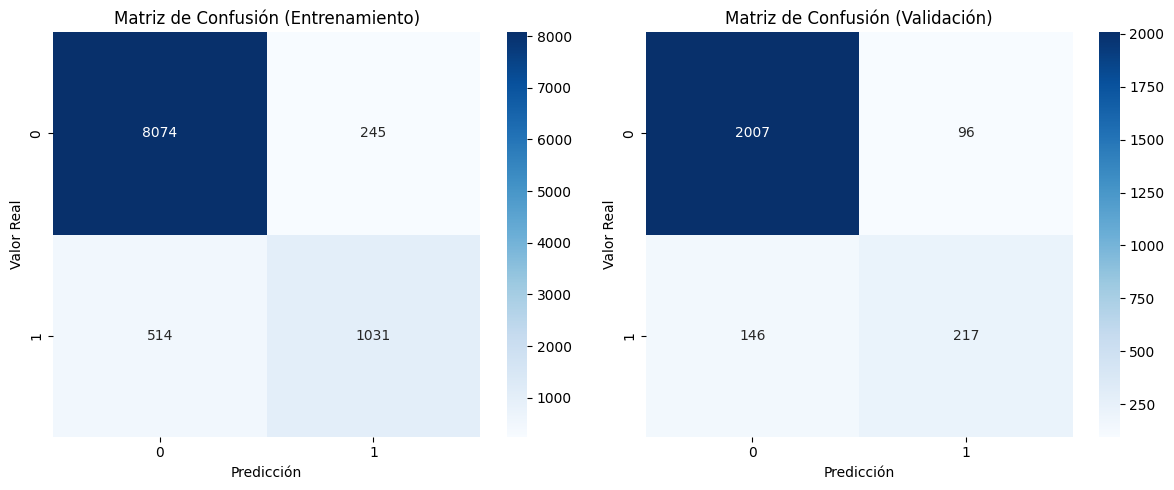

In [ ]:
xgb_skb = xgb

xgb_skb.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_skb3 = xgb_skb.predict(X_train)
y_test_skb3 = xgb_skb.predict(X_test)

eval_model(y_train_skb3, y_test_skb3)

## **3.4. RFE**

In [ ]:
from sklearn.feature_selection import RFE

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  return X_new

### **3.4.1. RFE ajustado a Random Forest**

In [ ]:
# Establecer Estimador
model = RandomForestClassifier(class_weight='balanced', random_state=28, n_jobs=-1)
# Obtener columnas seleciconadas - (10 caracteristicas)
rfe = recursive_feature_selection(X, y, model, 15)
# Nuevo conjunto de datos
X_rfe = X.iloc[:,rfe]
X_rfe.head()

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=28)

Num Features: 15
Selected Features: [ True  True  True  True  True  True  True  True  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False  True False  True False False False False False False False False
 False False  True False  True]
Feature Ranking: [ 1  1  1  1  1  1  1  1  1 14  1 11 24 21 12 10 34 15 16 23 26 25 17  7
 29  8 49 20 42 22 46  9 51  4 18 41 40 30 45 44 48 36 13  2 47 43  1 19
 28  1 37  1  6 38  5 50 31  3 32 33 35 27  1 39  1]


In [ ]:
X_rfe.head()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,OperatingSystems_2,Browser_2,Region_1,TrafficType_2,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,2,0,0,1,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,2,1,1,1,1,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,2,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,2,0,1,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,2,0,0,1,0,1


In [ ]:
RanFor_rfe = RandomForestClassifier(class_weight='balanced', random_state=28, n_jobs=-1)

RanFor_rfe.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_rfe1 = RanFor_rfe.predict(X_train)
y_test_rfe1 = RanFor_rfe.predict(X_test)

eval_model(y_train_rfe1, y_test_rfe1)

### **3.4.3. RFE ajustado a Gradient Boost Xtreme**

Num Features: 10
Selected Features: [ True False False False  True  True  True  True  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True  True False False
 False False False False False False False False False False False False
 False False False False  True]
Feature Ranking: [ 1  5 13 11  1  1  1  1  1 16  1 10 17 18 26 34 39 30 36 31 22 20 42  6
 28 25 50 52 54 33 47 55 56 21 12 35 23 29 44 27 24 19 15  3  1  1  8 37
 38  4 45  9 14 41  7 46 48 49 51 53 40 32  2 43  1]
Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 92.18%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      8319
           1       0.80      0.66      0.73      1545

    accuracy                           0.92      9864
   macro avg       0.87      

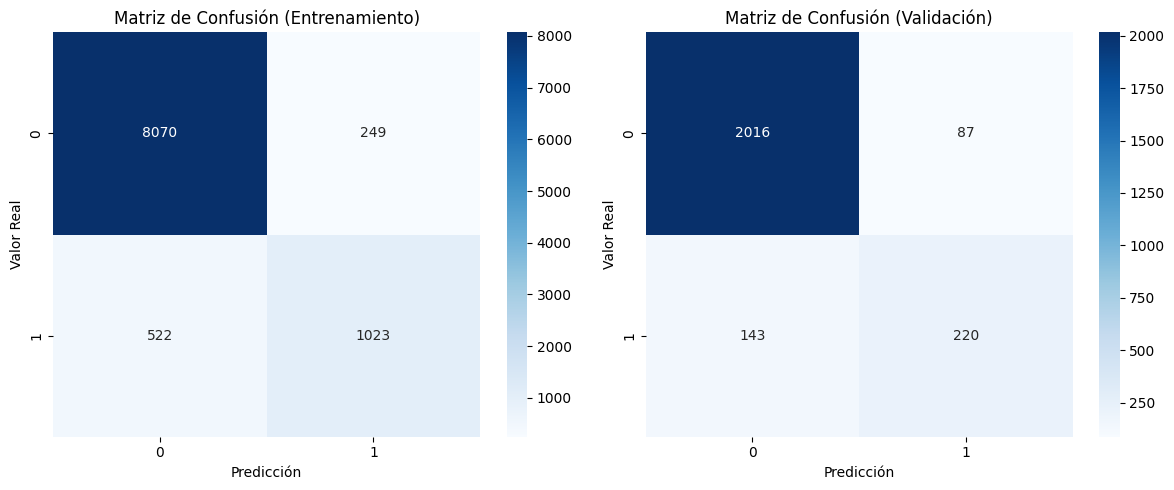

In [ ]:
# Establecer Estimador
model = xgb
# Obtener columnas seleciconadas - (15 caracteristicas)
rfe3 = recursive_feature_selection(X, y, model, 15)
# Nuevo conjunto de datos
X_rfe3 = X.iloc[:,rfe3]
X_rfe3.head()

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_rfe3, y, test_size=0.2, random_state=28)

xgb_rfe = xgb.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_rfe3 = xgb_rfe.predict(X_train)
y_test_rfe3 = xgb_rfe.predict(X_test)

eval_model(y_train_rfe3, y_test_rfe3)

## **3.5 SELECT FROM MODEL**

In [ ]:
from sklearn.feature_selection import SelectFromModel

### **3.5.1. Select Form Model ajustado a Random Forest**

In [ ]:
# Crear un objeto SelectFromModel utilizando el clasificador de bosques aleatorios
selector = SelectFromModel(estimator= RanFor_base)

selector.fit(X, y)

sfm = selector.get_support()

X_sfm = X.loc[:,sfm]
X_sfm

,Reviews,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month
0,0,1,0.000000,0.200000,0.200000,0.000000,2
1,0,2,64.000000,0.000000,0.100000,0.000000,2
2,0,1,0.000000,0.200000,0.200000,0.000000,2
3,0,2,2.666667,0.050000,0.140000,0.000000,2
4,0,10,627.500000,0.020000,0.050000,0.000000,2
...,...,...,...,...,...,...,...
12325,3,53,1783.791667,0.007143,0.029031,12.241717,12
12326,0,5,465.750000,0.000000,0.021333,0.000000,11
12327,0,6,184.250000,0.083333,0.086667,0.000000,11
12328,4,15,346.000000,0.000000,0.021053,0.000000,11


In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_sfm, y, test_size=0.2, random_state=28)

RanFor_sfm = RandomForestClassifier(class_weight='balanced', random_state=28, n_jobs=-1)

RanFor_sfm.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_sfm = RanFor_sfm.predict(X_train)
y_test_sfm = RanFor_sfm.predict(X_test)

eval_model(y_train_sfm, y_test_sfm)

### **3.5.2. Select From Model ajustado a Gradient Boost**

Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 92.77%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      8319
           1       0.82      0.69      0.75      1545

    accuracy                           0.93      9864
   macro avg       0.88      0.83      0.85      9864
weighted avg       0.92      0.93      0.93      9864


Métricas de desempeño sobre el conjunto de validación:
Accuracy Score: 90.75%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2103
           1       0.71      0.62      0.66       363

    accuracy                           0.91      2466
   macro avg       0.82      0.79      0.81      2466
weighted avg       0.90      0.91      0.90      2466



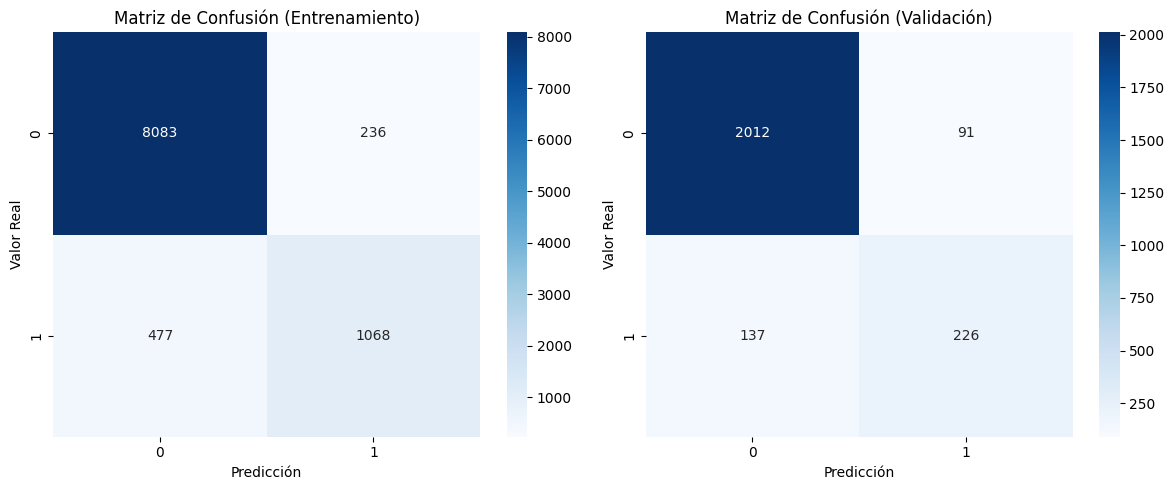

In [ ]:
# Crear un objeto SelectFromModel utilizando el clasificador de bosques aleatorios
selector2 = SelectFromModel(estimator= gboos)

selector2.fit(X, y)

sfm2 = selector2.get_support()

X_sfm2 = X.loc[:,sfm2]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_sfm2, y, test_size=0.2, random_state=28)

gboos_sfm = gboos
gboos_sfm.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_sfm2 = gboos_sfm.predict(X_train)
y_test_sfm2 = gboos_sfm.predict(X_test)

#Evaluar el modelo
eval_model(y_train_sfm2, y_test_sfm2)

## **3.6. SUBMUESTREO**

In [ ]:
# importar libreria
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=28)
# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=28)

original dataset shape: Counter({0: 10422, 1: 1908})
Resample dataset shape Counter({0: 1908, 1: 1908})


### **3.6.1. Submuestreo ajustado a Random Forest**

In [ ]:
RanFor_rus = RandomForestClassifier(class_weight='balanced', random_state=28)

RanFor_rus.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_rus = RanFor_rus.predict(X_train)
y_test_rus = RanFor_rus.predict(X_test)

eval_model(y_train_rus, y_test_rus)

### **3.6.2. Submuestreo ajustado a Gradient Boost**

Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 91.09%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1523
           1       0.92      0.90      0.91      1529

    accuracy                           0.91      3052
   macro avg       0.91      0.91      0.91      3052
weighted avg       0.91      0.91      0.91      3052


Métricas de desempeño sobre el conjunto de validación:
Accuracy Score: 84.16%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       385
           1       0.82      0.87      0.85       379

    accuracy                           0.84       764
   macro avg       0.84      0.84      0.84       764
weighted avg       0.84      0.84      0.84       764



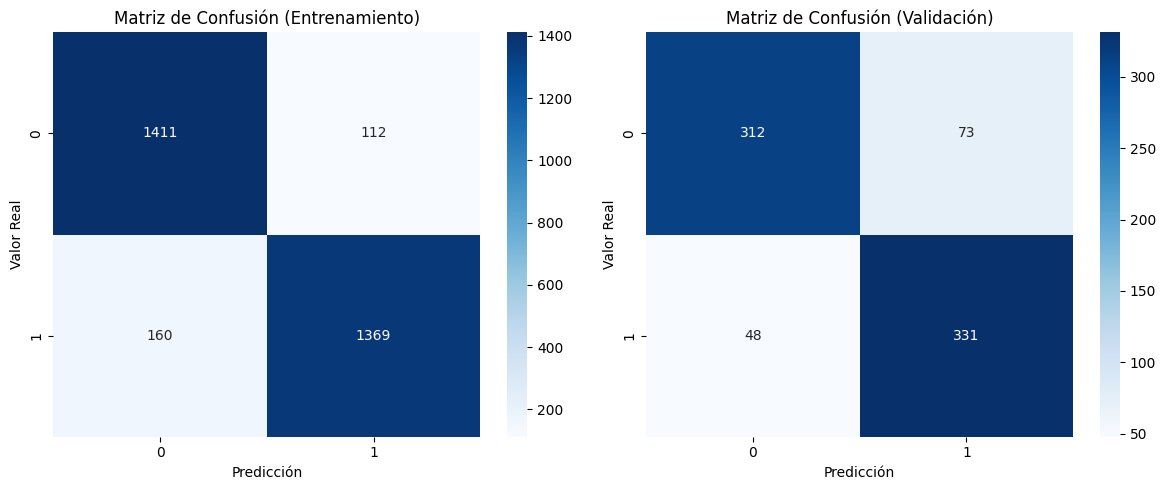

In [ ]:
gboos_rus = gboos

gboos_rus.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_rus2 = gboos_rus.predict(X_train)
y_test_rus2 = gboos_rus.predict(X_test)

eval_model(y_train_rus2, y_test_rus2)

## **3.7. SOBREMUESTREO**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=28)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=28)

Original dataset shape Counter({0: 10422, 1: 1908})
Resample dataset shape Counter({0: 10422, 1: 10422})


### **3.7.1. Sobremuestreo ajustado a RandomForest**

In [ ]:
RanFor_ros = RandomForestClassifier(class_weight='balanced', random_state=28,
            n_estimators = 200,
            criterion    = 'gini',
            max_depth    = 10,
            max_leaf_nodes = 10,
            n_jobs       = -1)

RanFor_ros.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_ros = RanFor_ros.predict(X_train)
y_test_ros = RanFor_ros.predict(X_test)

eval_model(y_train_ros, y_test_ros)

### **3.6.2. Submuestreo ajustado a Gradient Boost**

Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 89.24%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      8361
           1       0.89      0.90      0.89      8314

    accuracy                           0.89     16675
   macro avg       0.89      0.89      0.89     16675
weighted avg       0.89      0.89      0.89     16675


Métricas de desempeño sobre el conjunto de validación:
Accuracy Score: 88.68%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2061
           1       0.88      0.90      0.89      2108

    accuracy                           0.89      4169
   macro avg       0.89      0.89      0.89      4169
weighted avg       0.89      0.89      0.89      4169



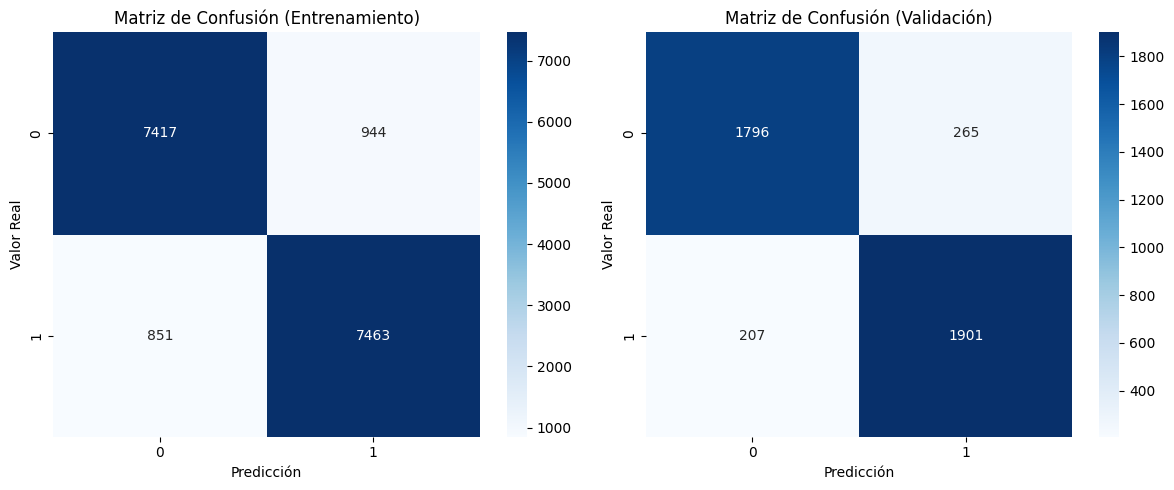

In [ ]:
gboos_ros = gboos

gboos_ros.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_ros2 = gboos_ros.predict(X_train)
y_test_ros2 = gboos_ros.predict(X_test)

eval_model(y_train_ros2, y_test_ros2)

# **5. Seleccionar y Ajustar Modelos**

Crear un dataframe que contenga solo algunas variables con mayor peso y comunmente establecidas por métodos anteriores.

In [ ]:
# Separar las características (X) y la variable objetivo (y)
df_ventas2 = df_ventas1.copy()

# Define una lista de prefijos que quieres eliminar
prefijos_a_eliminar = ['OperatingSystems_', 'Browser_', 'TrafficType_', 'Region_']

# Utiliza filter para seleccionar las columnas que empiezan con los prefijos
columnas_a_eliminar = df_ventas2.filter(regex='^' + '|'.join(prefijos_a_eliminar)).columns

# Elimina las columnas seleccionadas del DataFrame
df_ventas2 = df_ventas2.drop(columns=columnas_a_eliminar)

delete = ["Reviews_Duration", 'Informational_Duration', 'ProductRelated_Duration', 'SpecialDay']
df_ventas2 = df_ventas2.drop(columns=delete)

# Muestra el DataFrame resultante
print("DataFrame sin las columnas seleccionadas:")
df_ventas2

DataFrame sin las columnas seleccionadas:


,Purchase,Reviews,Informational,ProductRelated,BounceRates,ExitRates,PageValues,Month,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,0,1,0.200000,0.200000,0.000000,2,0,0,0,1
1,0,0,0,2,0.000000,0.100000,0.000000,2,0,0,0,1
2,0,0,0,1,0.200000,0.200000,0.000000,2,0,0,0,1
3,0,0,0,2,0.050000,0.140000,0.000000,2,0,0,0,1
4,0,0,0,10,0.020000,0.050000,0.000000,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0,3,0,53,0.007143,0.029031,12.241717,12,1,0,0,1
12326,0,0,0,5,0.000000,0.021333,0.000000,11,1,0,0,1
12327,0,0,0,6,0.083333,0.086667,0.000000,11,1,0,0,1
12328,0,4,0,15,0.000000,0.021053,0.000000,11,0,0,0,1


Preparar nuevamente los datos

In [ ]:
# Separar las características (X) y la variable objetivo (y)
X2 = df_ventas2.drop(['Purchase'], axis=1)
y2 = df_ventas2['Purchase']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=28)

#Imprimir tamaño dataset
print("Tamaño del conjunto de entrenamiento: ", X_train.shape)
print("Tamaño del conjunto de validación", X_test.shape)

Tamaño del conjunto de entrenamiento:  (9864, 11)
Tamaño del conjunto de validación (2466, 11)


## **REGRESIÓN LOGÍSTICA AJUSTADO**

Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 86.92%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      8367
           1       0.55      0.74      0.63      1497

    accuracy                           0.87      9864
   macro avg       0.75      0.82      0.78      9864
weighted avg       0.89      0.87      0.88      9864


Métricas de desempeño sobre el conjunto de validación:
Accuracy Score: 86.86%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2055
           1       0.58      0.74      0.65       411

    accuracy                           0.87      2466
   macro avg       0.76      0.82      0.79      2466
weighted avg       0.88      0.87      0.87      2466



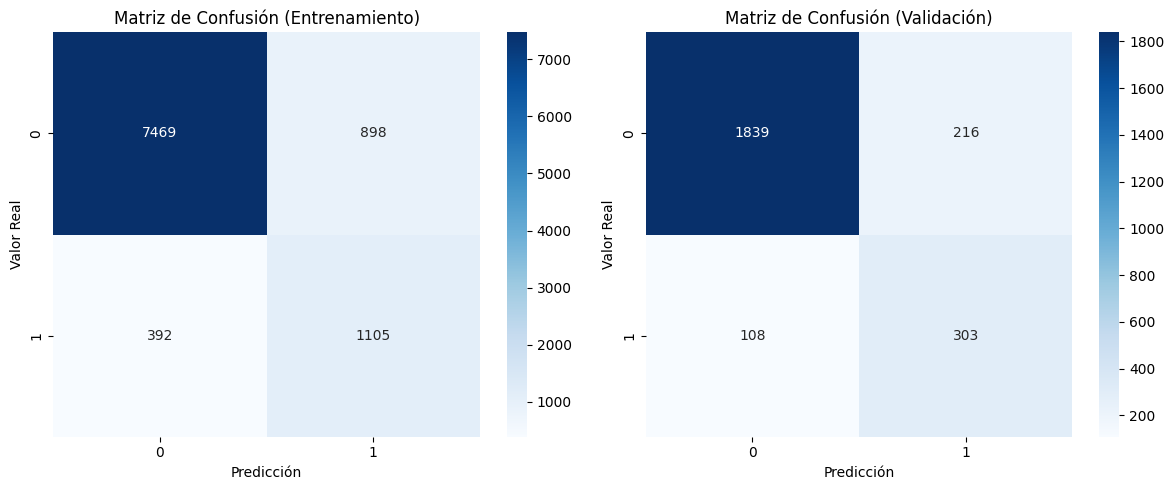

In [ ]:
from sklearn.preprocessing import StandardScaler

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Seleccionar las columnas para la estandarización
columnas_a_estandarizar = ['Reviews', 'Informational', 'ProductRelated', 'BounceRates','ExitRates', 'PageValues', 'Month']

# Estandarizar solo las columnas seleccionadas
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[columnas_a_estandarizar] = scaler.fit_transform(X_train_scaled[columnas_a_estandarizar])
X_test_scaled[columnas_a_estandarizar] = scaler.transform(X_test_scaled[columnas_a_estandarizar])

# Crear el modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')

# Entrenar el modelo
logistic_model.fit(X_train_scaled, y_train)

# Predecir sobre los datos de entrenamiento y prueba
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

eval_model(y_train_pred, y_test_pred)

## **RANDOM FOREST AJUSTADO**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que se desean ajustar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],  # Profundidad máxima de los árboles
    #'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en cada hoja
    #'max_features': ['auto', 'sqrt']  # Número máximo de características consideradas para dividir un nodo
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced', random_state=28, n_jobs=-1),
                           param_grid=param_grid,
                           cv=5,  # Número de folds para la validación cruzada
                           scoring='f1',  # Métrica de evaluación
                           n_jobs=-1)  # Utilizar todos los núcleos de CPU disponibles

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y los mejores parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Mejor modelo:", best_model)
print("Mejores parámetros:", best_params)

KeyboardInterrupt: 

Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 93.63%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      8319
           1       0.74      0.93      0.82      1545

    accuracy                           0.94      9864
   macro avg       0.86      0.93      0.89      9864
weighted avg       0.95      0.94      0.94      9864


Métricas de desempeño sobre el conjunto de validación:
Accuracy Score: 88.65%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2103
           1       0.59      0.75      0.66       363

    accuracy                           0.89      2466
   macro avg       0.77      0.83      0.80      2466
weighted avg       0.90      0.89      0.89      2466



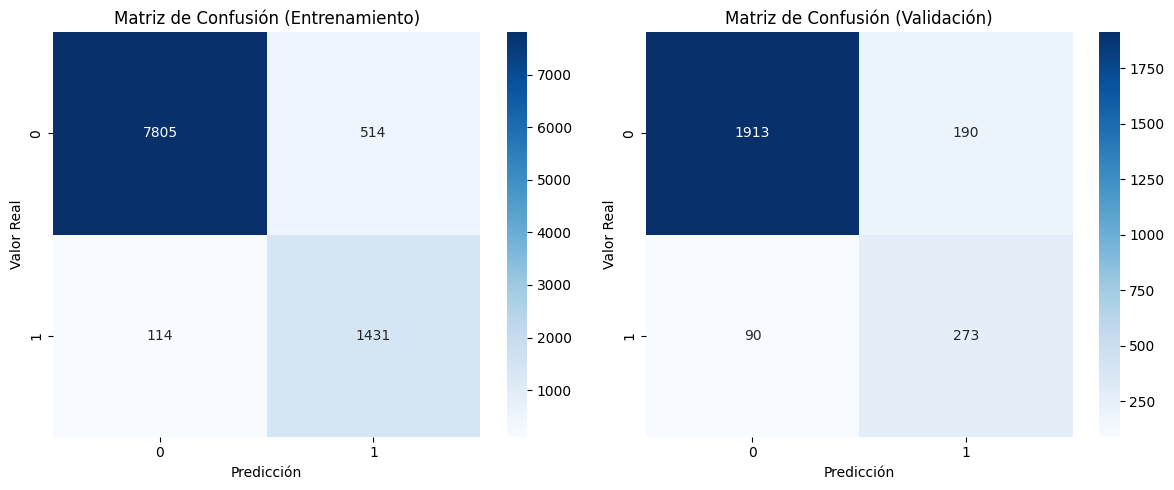

In [ ]:
#Inicializar las variables

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=28)

#RANDOM FOREST BASE
RanFor_aj = RandomForestClassifier(class_weight='balanced', min_samples_leaf=4, n_jobs=-1,
                       random_state=28)

RanFor_aj.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_aj = RanFor_aj.predict(X_train)
y_test_aj = RanFor_aj.predict(X_test)

# Evaluar el modelo
eval_model(y_train_aj, y_test_aj)

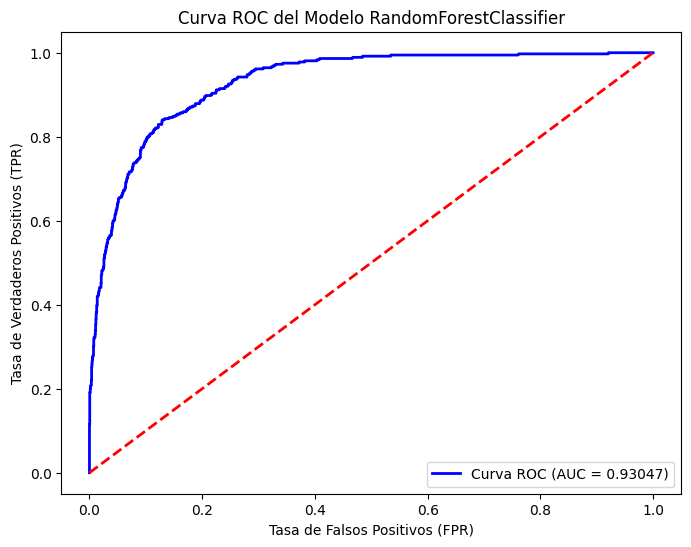

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predecir probabilidades sobre los datos de prueba
y_test_probs = RanFor_aj.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_test_probs)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del Modelo RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

##**GRADIENT BOOST XTREME**

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=28)

# Definir los hiperparámetros que se desean ajustar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'learning_rate': [0.05, 0.1, 0.25],  # Tasa de aprendizaje
    'max_depth': [4, 6, 8]  # Profundidad máxima del árbol
    #'min_child_weight': [1, 2, 3]  # Peso mínimo de la hoja del árbol
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=28),
                           param_grid=param_grid, cv=5, scoring='recall')

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y los mejores parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Mejor modelo:", best_model)
print("Mejores parámetros:", best_params)

NameError: name 'GridSearchCV' is not defined

Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 91.59%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      8319
           1       0.78      0.65      0.71      1545

    accuracy                           0.92      9864
   macro avg       0.86      0.81      0.83      9864
weighted avg       0.91      0.92      0.91      9864


Métricas de desempeño sobre el conjunto de validación:
Accuracy Score: 90.47%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2103
           1       0.70      0.62      0.66       363

    accuracy                           0.90      2466
   macro avg       0.82      0.79      0.80      2466
weighted avg       0.90      0.90      0.90      2466



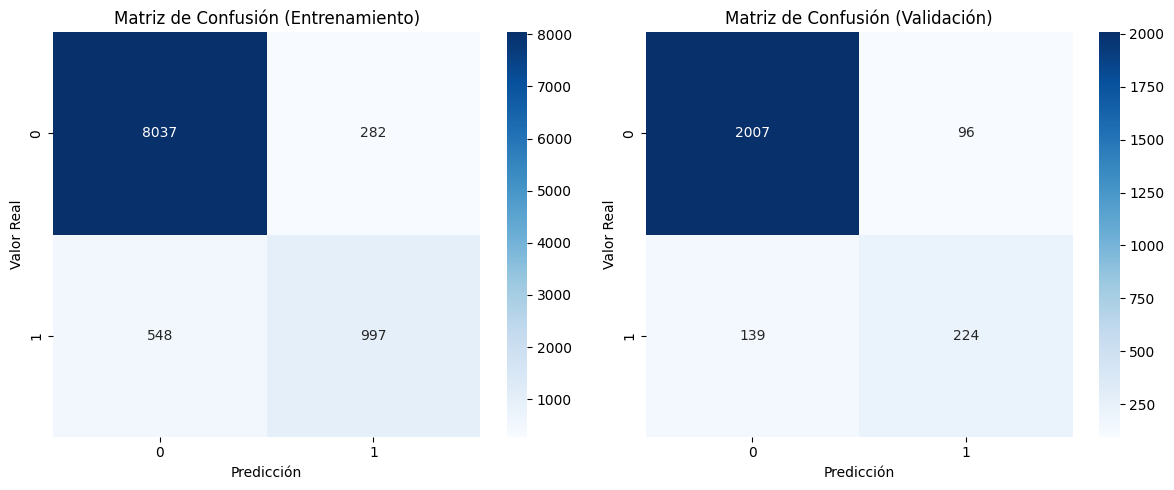

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=28)

xgb = XGBClassifier(n_estimators = 100, random_state = 28, learning_rate = 0.05, max_depth = 4)

xgb.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

#Evaluar el modelo
eval_model(y_train_xgb, y_test_xgb)

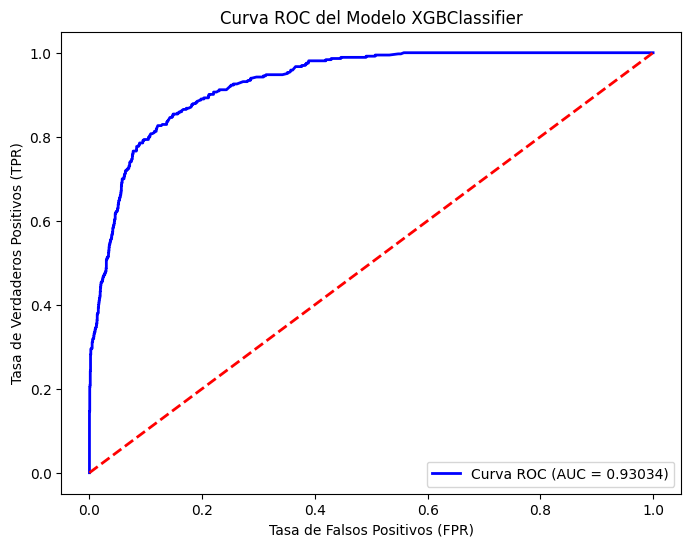

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predecir probabilidades sobre los datos de prueba
y_test_probs = xgb.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_test_probs)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del Modelo XGBClassifier')
plt.legend(loc='lower right')
plt.show()

### **Ajuste de Submuestreo**

In [ ]:
# importar libreria
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=28)
# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X2, y2)

print('original dataset shape:', Counter(y2))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 10422, 1: 1908})
Resample dataset shape Counter({0: 1908, 1: 1908})


Métricas de desempeño sobre el conjunto de entrenamiento:
Accuracy Score: 86.63%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1523
           1       0.87      0.86      0.87      1529

    accuracy                           0.87      3052
   macro avg       0.87      0.87      0.87      3052
weighted avg       0.87      0.87      0.87      3052


Métricas de desempeño sobre el conjunto de validación:
Accuracy Score: 84.95%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       385
           1       0.83      0.88      0.85       379

    accuracy                           0.85       764
   macro avg       0.85      0.85      0.85       764
weighted avg       0.85      0.85      0.85       764



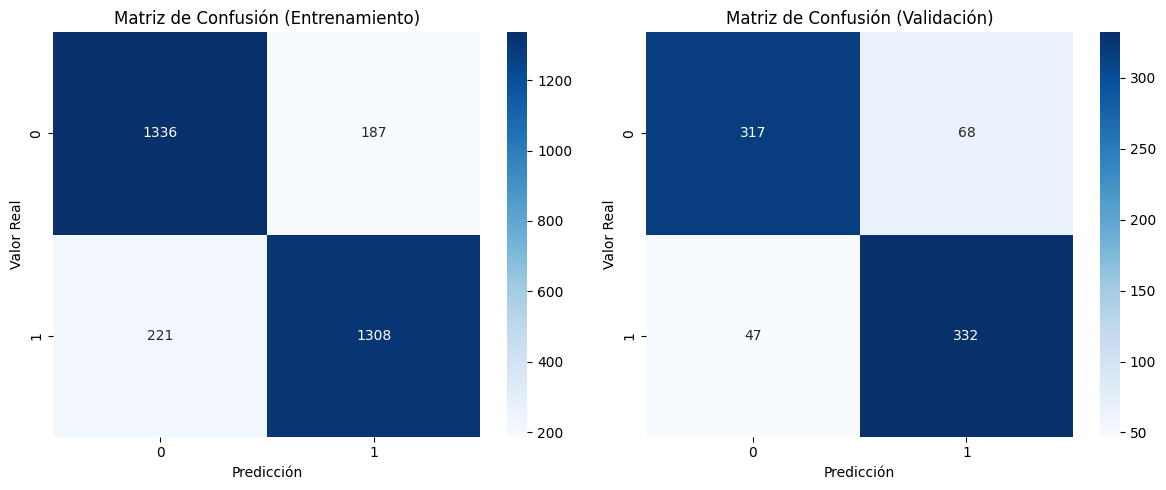

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=28)

xgb.fit(X_train, y_train)

# Predicciones sobre el conjunto de entrenamiento y validación
y_train_xgb2 = xgb.predict(X_train)
y_test_xgb2 = xgb.predict(X_test)

eval_model(y_train_xgb2, y_test_xgb2)

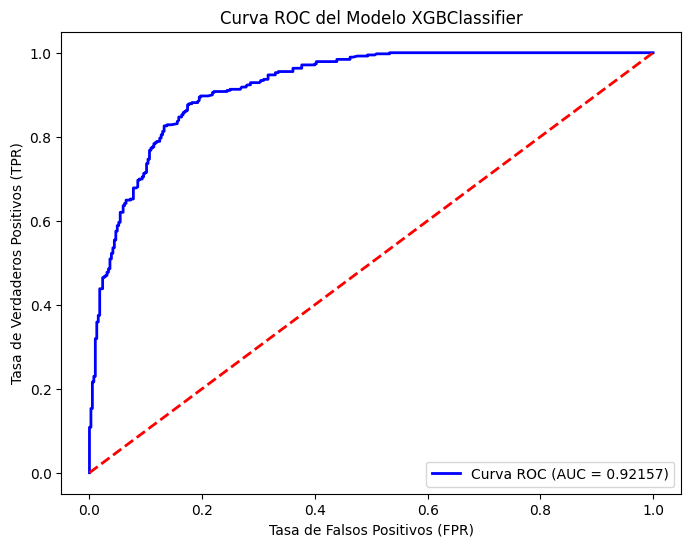

In [ ]:
# Predecir probabilidades sobre los datos de prueba
y_test_probs = xgb.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_test_probs)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del Modelo XGBClassifier')
plt.legend(loc='lower right')
plt.show()